<a href="https://colab.research.google.com/github/HarveyEby/DATA-SCIENCE-Python--Linear-Regression-/blob/main/prediction_on_readmission_for_diabetes_patients.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Set Description


Purpose - The purpose of my dissertation is to predict the readmission for diabetes
patients using demographic data and reduce cost of hospitalisation. The model perfor-
mance was evaluated and measured using performance criteria.
Methodology/Approach - The dataset was retrieved from the Centre for Machine Learn-
ing and Intelligent Systems at the University of California, Irvine. The model was
trained with eight machine learning models, namely, logistic regression, decision tree,
multi-layer perception, gradient boosting, k-nearest neighbours, support vector ma-
chine, gaussian na ̈ıve bayes and random forest classifiers algorithms. Decision Tree
Classifier was the top-performing model based on accuracy, precision, and recall.
Results – Among the machine learning model used in this dissertation, decision tree
classifier was the top-performing model based on accuracy, precision, and recall. This
model’s effectiveness and the implementation of the Getting It Right First Time (GIRFT)
[73] initiative will save approximately £14 million annually, resulting in a net savings
of £9 million [77] for the NHS by identifying and addressing errors, preventing un-
necessary re-admissions, and reducing the length of hospital stays, the model can help
reduce the annual expenditure of £2.5 billion on diabetes inpatient care.
iii











# Data Preparation & Exploration

In [1]:
#Loading libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading Dataset
df = pd.read_csv("diabetic_data.csv")

In [3]:
#displaying first 10 rows of data
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
encounter_id,2278392,149190,64410,500364,16680,35754,55842,63768,12522,15738
patient_nbr,8222157,55629189,86047875,82442376,42519267,82637451,84259809,114882984,48330783,63555939
race,Caucasian,Caucasian,AfricanAmerican,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian
gender,Female,Female,Female,Male,Male,Male,Male,Male,Female,Female
age,[0-10),[10-20),[20-30),[30-40),[40-50),[50-60),[60-70),[70-80),[80-90),[90-100)
weight,?,?,?,?,?,?,?,?,?,?
admission_type_id,6,1,1,1,1,2,3,1,2,3
discharge_disposition_id,25,1,1,1,1,1,1,1,1,3
admission_source_id,1,7,7,7,7,2,2,7,4,4
time_in_hospital,1,3,2,2,1,3,4,5,13,12


In [4]:
#checking shape of the dataset
df.shape

(101766, 50)

In [5]:
#Checking data types of each variable
df.dtypes

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride         

In [6]:
#Checking for missing values in dataset
#In the dataset missing values are represented as '?' sign
for col in df.columns:
    if df[col].dtype == object:
         print(col,df[col][df[col] == '?'].count())

race 2273
gender 0
age 0
weight 98569
payer_code 40256
medical_specialty 49949
diag_1 21
diag_2 358
diag_3 1423
max_glu_serum 0
A1Cresult 0
metformin 0
repaglinide 0
nateglinide 0
chlorpropamide 0
glimepiride 0
acetohexamide 0
glipizide 0
glyburide 0
tolbutamide 0
pioglitazone 0
rosiglitazone 0
acarbose 0
miglitol 0
troglitazone 0
tolazamide 0
examide 0
citoglipton 0
insulin 0
glyburide-metformin 0
glipizide-metformin 0
glimepiride-pioglitazone 0
metformin-rosiglitazone 0
metformin-pioglitazone 0
change 0
diabetesMed 0
readmitted 0


In [7]:
# gender was coded differently so we use a custom count for this one
print('gender', df['gender'][df['gender'] == 'Unknown/Invalid'].count())

gender 3


## Dealing with Missing Values
Variable weight contains approximate 98% of the missing values so there is no significance in filling those missing values so we decided to drop these variables. Variable Payer code and medical specialty contains approximate 40% missing values so we also dropped these variables. Variables race, diag_1, diag_2, diag_3 and gender contains very less missing values as compared to other attributes which we dropped so for these attributes we also decided to drop those where missing values contains.

In [8]:
#dropping columns with large number of missing values
df = df.drop(['weight','payer_code','medical_specialty'], axis = 1)

In [9]:
drop_Idx = set(df[(df['diag_1'] == '?') & (df['diag_2'] == '?') & (df['diag_3'] == '?')].index)

drop_Idx = drop_Idx.union(set(df['diag_1'][df['diag_1'] == '?'].index))
drop_Idx = drop_Idx.union(set(df['diag_2'][df['diag_2'] == '?'].index))
drop_Idx = drop_Idx.union(set(df['diag_3'][df['diag_3'] == '?'].index))
drop_Idx = drop_Idx.union(set(df['race'][df['race'] == '?'].index))
drop_Idx = drop_Idx.union(set(df[df['discharge_disposition_id'] == 11].index))
drop_Idx = drop_Idx.union(set(df['gender'][df['gender'] == 'Unknown/Invalid'].index))
new_Idx = list(set(df.index) - set(drop_Idx))
df = df.iloc[new_Idx]

variables (drugs named citoglipton and examide), all records have the same value. So essentially these cannot provide any interpretive or discriminatory information for predicting readmission so we decided to drop these two variables


In [10]:
df = df.drop(['citoglipton', 'examide'], axis = 1)

In [11]:
#Checking for missing values in the data
for col in df.columns:
    if df[col].dtype == object:
         print(col,df[col][df[col] == '?'].count())

print('gender', df['gender'][df['gender'] == 'Unknown/Invalid'].count())

race 0
gender 0
age 0
diag_1 0
diag_2 0
diag_3 0
max_glu_serum 0
A1Cresult 0
metformin 0
repaglinide 0
nateglinide 0
chlorpropamide 0
glimepiride 0
acetohexamide 0
glipizide 0
glyburide 0
tolbutamide 0
pioglitazone 0
rosiglitazone 0
acarbose 0
miglitol 0
troglitazone 0
tolazamide 0
insulin 0
glyburide-metformin 0
glipizide-metformin 0
glimepiride-pioglitazone 0
metformin-rosiglitazone 0
metformin-pioglitazone 0
change 0
diabetesMed 0
readmitted 0
gender 0


## Feature Engineering

This is highly subjective, and partly depends on a knowledge of health care services, and making sense of the potential relationships between features. There are perhaps thousands of ways to try here. We tried some...

* Service utilization: The data contains variables for number of inpatient (admissions), emergency room visits and outpatient visits for a given patient in the previous one year. These are (crude) measures of how much hospital/clinic services a person has used in the past year. We added these three to create a new variable called service utilization (see figure below). The idea was to see which version gives us better results. Granted, we did not apply any special weighting to the three ingredients of service utilization but we wanted to try something simple at this stage.



In [12]:
df['service_utilization'] = df['number_outpatient'] + df['number_emergency'] + df['number_inpatient']

* Number of medication changes: The dataset contains 23 features for 23 drugs (or combos) which indicate for each of these, whether a change in that medication was made or not during the current hospital stay of patient. Medication change for diabetics upon admission has been shown by previous research to be associated with lower readmission rates. We decided to count how many changes were made in total for each patient, and declared that a new feature. The reasoning here was to both simplify the model and possibly discover a relationship with number of changes regardless of which drug was changed.

In [13]:
keys = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'insulin', 'glyburide-metformin', 'tolazamide', 'metformin-pioglitazone','metformin-rosiglitazone', 'glimepiride-pioglitazone', 'glipizide-metformin', 'troglitazone', 'tolbutamide', 'acetohexamide']
for col in keys:
    colname = str(col) + 'temp'
    df[colname] = df[col].apply(lambda x: 0 if (x == 'No' or x == 'Steady') else 1)
df['numchange'] = 0
for col in keys:
    colname = str(col) + 'temp'
    df['numchange'] = df['numchange'] + df[colname]
    del df[colname]

df['numchange'].value_counts()

0    70142
1    24922
2     1271
3      106
4        5
Name: numchange, dtype: int64

In [14]:
# re-encoding admission type, discharge type and admission source into fewer categories

df['admission_type_id'] = df['admission_type_id'].replace(2,1)
df['admission_type_id'] = df['admission_type_id'].replace(7,1)
df['admission_type_id'] = df['admission_type_id'].replace(6,5)
df['admission_type_id'] = df['admission_type_id'].replace(8,5)

df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(6,1)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(8,1)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(9,1)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(13,1)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(3,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(4,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(5,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(14,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(22,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(23,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(24,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(12,10)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(15,10)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(16,10)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(17,10)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(25,18)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(26,18)

df['admission_source_id'] = df['admission_source_id'].replace(2,1)
df['admission_source_id'] = df['admission_source_id'].replace(3,1)
df['admission_source_id'] = df['admission_source_id'].replace(5,4)
df['admission_source_id'] = df['admission_source_id'].replace(6,4)
df['admission_source_id'] = df['admission_source_id'].replace(10,4)
df['admission_source_id'] = df['admission_source_id'].replace(22,4)
df['admission_source_id'] = df['admission_source_id'].replace(25,4)
df['admission_source_id'] = df['admission_source_id'].replace(15,9)
df['admission_source_id'] = df['admission_source_id'].replace(17,9)
df['admission_source_id'] = df['admission_source_id'].replace(20,9)
df['admission_source_id'] = df['admission_source_id'].replace(21,9)
df['admission_source_id'] = df['admission_source_id'].replace(13,11)
df['admission_source_id'] = df['admission_source_id'].replace(14,11)

* Encoding some variables: The original dataset used string values for gender, race, medication change, and each of the 23 drugs used. To better fit those variables into our model, we interpret the variables to numeric binary variables to reflect their nature. For example, we encoded the “ medication change ” feature from “No” (no change) and “Ch” (changed) into 0 and 1.


In [15]:
df['change'] = df['change'].replace('Ch', 1)
df['change'] = df['change'].replace('No', 0)
df['gender'] = df['gender'].replace('Male', 1)
df['gender'] = df['gender'].replace('Female', 0)
df['diabetesMed'] = df['diabetesMed'].replace('Yes', 1)
df['diabetesMed'] = df['diabetesMed'].replace('No', 0)
# keys is the same as before
for col in keys:
    df[col] = df[col].replace('No', 0)
    df[col] = df[col].replace('Steady', 1)
    df[col] = df[col].replace('Up', 1)
    df[col] = df[col].replace('Down', 1)

We also reduced both A1C test result and Glucose serum test result into categories of Normal, Abnormal and Not tested.


In [16]:
df['A1Cresult'] = df['A1Cresult'].replace('>7', 1)
df['A1Cresult'] = df['A1Cresult'].replace('>8', 1)
df['A1Cresult'] = df['A1Cresult'].replace('Norm', 0)
df['A1Cresult'] = df['A1Cresult'].replace('None', -99)
df['max_glu_serum'] = df['max_glu_serum'].replace('>200', 1)
df['max_glu_serum'] = df['max_glu_serum'].replace('>300', 1)
df['max_glu_serum'] = df['max_glu_serum'].replace('Norm', 0)
df['max_glu_serum'] = df['max_glu_serum'].replace('None', -99)

* Dealing with age: There are different ways to deal with this. The dataset only gives us age as 10 year categories, so we don’t know the exact age of each patient. The previous study on this dataset used age categories as nominal variables, but we wanted to be able to see the effect of increasing age on readmission, even if in a crude way. To do that, we assume that age of the patient on average lies at the midpoint of the age category. For example, if the patient’s age category is 20–30 years, then we assume the age = 25 years. So we converted age categories to midpoints, resulting in a numeric variable:

In [17]:
# code age intervals [0-10) - [90-100) from 1-10
for i in range(0,10):
    df['age'] = df['age'].replace('['+str(10*i)+'-'+str(10*(i+1))+')', i+1)
df['age'].value_counts()

8     24815
7     21521
6     16546
9     16223
5      9208
4      3538
10     2594
3      1471
2       466
1        64
Name: age, dtype: int64

Collapsing of Multiple Encounters for same patient Some patients in the dataset had more than one encounter.We could not count them as independent encounters because that bias the results towards those patients who had multiple encounters. Thus we tried multiple techniques to collapse and consolidate multiple encounters for same patient such as:

* Considering more than 2 readmissions across multiple encounters as readmission for collapsed record.
* Considering average stay at hospital across multiple encounters.
* Considering the percentage of the medication changes across multiple encounters
* Considering the total number of the encounters to replace the encounter unique ID
* Considering the combination of diagnoses across multiple encounters as a list However, taking the features such as “diagnosis”, for instance, we did not find it not meaningful to combine multiple categorical values into an array for building data model. We then considered first encounter and last encounter separately as possible representations of multiple encounters. However, last encounters gave extremely imbalanced data for readmissions (96/4 Readmissions vs No Readmissions) and thus, we decided to use first encounters of patients with multiple encounters. This resulted in dataset being reduced to about 70,000 encounters:

In [18]:
df2 = df.drop_duplicates(subset= ['patient_nbr'], keep = 'first')
df2.shape
(70442, 55)

(70442, 55)

In [19]:
df.head().T

,1,2,3,4,5
encounter_id,149190,64410,500364,16680,35754
patient_nbr,55629189,86047875,82442376,42519267,82637451
race,Caucasian,AfricanAmerican,Caucasian,Caucasian,Caucasian
gender,0,0,1,1,1
age,2,3,4,5,6
admission_type_id,1,1,1,1,1
discharge_disposition_id,1,1,1,1,1
admission_source_id,7,7,7,7,1
time_in_hospital,3,2,2,1,3
num_lab_procedures,59,11,44,51,31


* Encoding the outcome variable: The outcome we are looking at is whether the patient gets readmitted to the hospital within 30 days or not. The variable actually has < 30, > 30 and No Readmission categories. To reduce our problem to a binary classification, we combined the readmission after 30 days and no readmission into a single category:

In [20]:
df['readmitted'].value_counts()

NO     50731
>30    34649
<30    11066
Name: readmitted, dtype: int64

In [21]:
df['readmitted'] = df['readmitted'].replace('>30', 0)
df['readmitted'] = df['readmitted'].replace('<30', 1)
df['readmitted'] = df['readmitted'].replace('NO', 0)

* Categorization of diagnoses: The dataset contained up to three diagnoses for a given patient (primary, secondary and additional). However, each of these had 700–900 unique ICD codes and it is extremely difficult to include them in the model and interpret meaningfully. Therefore, we collapsed these diagnosis codes into 9 disease categories in an almost similar fashion to that done in the original publication using this dataset. These 9 categories include Circulatory, Respiratory, Digestive, Diabetes, Injury, Musculoskeletal, Genitourinary, Neoplasms, and Others. Although we did this for primary, secondary and additional diagnoses, we eventually decided to use only the primary diagnosis in our model. Doing this in python was slightly cumbersome because, well, we are mapping the disease codes to certain category names. Below code should demonstrate this easily.

In [22]:
# Creating additional columns for diagnosis# Creati
df['level1_diag1'] = df['diag_1']
df['level2_diag1'] = df['diag_1']
df['level1_diag2'] = df['diag_2']
df['level2_diag2'] = df['diag_2']
df['level1_diag3'] = df['diag_3']
df['level2_diag3'] = df['diag_3']

In [23]:
df.loc[df['diag_1'].str.contains('V'), ['level1_diag1', 'level2_diag1']] = 0
df.loc[df['diag_1'].str.contains('E'), ['level1_diag1', 'level2_diag1']] = 0
df.loc[df['diag_2'].str.contains('V'), ['level1_diag2', 'level2_diag2']] = 0
df.loc[df['diag_2'].str.contains('E'), ['level1_diag2', 'level2_diag2']] = 0
df.loc[df['diag_3'].str.contains('V'), ['level1_diag3', 'level2_diag3']] = 0
df.loc[df['diag_3'].str.contains('E'), ['level1_diag3', 'level2_diag3']] = 0
df['level1_diag1'] = df['level1_diag1'].replace('?', -1)
df['level2_diag1'] = df['level2_diag1'].replace('?', -1)
df['level1_diag2'] = df['level1_diag2'].replace('?', -1)
df['level2_diag2'] = df['level2_diag2'].replace('?', -1)
df['level1_diag3'] = df['level1_diag3'].replace('?', -1)
df['level2_diag3'] = df['level2_diag3'].replace('?', -1)

In [24]:
df['level1_diag1'] = df['level1_diag1'].astype(float)
df['level2_diag1'] = df['level2_diag1'].astype(float)
df['level1_diag2'] = df['level1_diag2'].astype(float)
df['level2_diag2'] = df['level2_diag2'].astype(float)
df['level1_diag3'] = df['level1_diag3'].astype(float)
df['level2_diag3'] = df['level2_diag3'].astype(float)

In [25]:
for index, row in df.iterrows():
    if (row['level1_diag1'] >= 390 and row['level1_diag1'] < 460) or (np.floor(row['level1_diag1']) == 785):
        df.loc[index, 'level1_diag1'] = 1
    elif (row['level1_diag1'] >= 460 and row['level1_diag1'] < 520) or (np.floor(row['level1_diag1']) == 786):
        df.loc[index, 'level1_diag1'] = 2
    elif (row['level1_diag1'] >= 520 and row['level1_diag1'] < 580) or (np.floor(row['level1_diag1']) == 787):
        df.loc[index, 'level1_diag1'] = 3
    elif (np.floor(row['level1_diag1']) == 250):
        df.loc[index, 'level1_diag1'] = 4
    elif (row['level1_diag1'] >= 800 and row['level1_diag1'] < 1000):
        df.loc[index, 'level1_diag1'] = 5
    elif (row['level1_diag1'] >= 710 and row['level1_diag1'] < 740):
        df.loc[index, 'level1_diag1'] = 6
    elif (row['level1_diag1'] >= 580 and row['level1_diag1'] < 630) or (np.floor(row['level1_diag1']) == 788):
        df.loc[index, 'level1_diag1'] = 7
    elif (row['level1_diag1'] >= 140 and row['level1_diag1'] < 240):
        df.loc[index, 'level1_diag1'] = 8
    else:
        df.loc[index, 'level1_diag1'] = 0

    if (row['level1_diag2'] >= 390 and row['level1_diag2'] < 460) or (np.floor(row['level1_diag2']) == 785):
        df.loc[index, 'level1_diag2'] = 1
    elif (row['level1_diag2'] >= 460 and row['level1_diag2'] < 520) or (np.floor(row['level1_diag2']) == 786):
        df.loc[index, 'level1_diag2'] = 2
    elif (row['level1_diag2'] >= 520 and row['level1_diag2'] < 580) or (np.floor(row['level1_diag2']) == 787):
        df.loc[index, 'level1_diag2'] = 3
    elif (np.floor(row['level1_diag2']) == 250):
        df.loc[index, 'level1_diag2'] = 4
    elif (row['level1_diag2'] >= 800 and row['level1_diag2'] < 1000):
        df.loc[index, 'level1_diag2'] = 5
    elif (row['level1_diag2'] >= 710 and row['level1_diag2'] < 740):
        df.loc[index, 'level1_diag2'] = 6
    elif (row['level1_diag2'] >= 580 and row['level1_diag2'] < 630) or (np.floor(row['level1_diag2']) == 788):
        df.loc[index, 'level1_diag2'] = 7
    elif (row['level1_diag2'] >= 140 and row['level1_diag2'] < 240):
        df.loc[index, 'level1_diag2'] = 8
    else:
        df.loc[index, 'level1_diag2'] = 0

    if (row['level1_diag3'] >= 390 and row['level1_diag3'] < 460) or (np.floor(row['level1_diag3']) == 785):
        df.loc[index, 'level1_diag3'] = 1
    elif (row['level1_diag3'] >= 460 and row['level1_diag3'] < 520) or (np.floor(row['level1_diag3']) == 786):
        df.loc[index, 'level1_diag3'] = 2
    elif (row['level1_diag3'] >= 520 and row['level1_diag3'] < 580) or (np.floor(row['level1_diag3']) == 787):
        df.loc[index, 'level1_diag3'] = 3
    elif (np.floor(row['level1_diag3']) == 250):
        df.loc[index, 'level1_diag3'] = 4
    elif (row['level1_diag3'] >= 800 and row['level1_diag3'] < 1000):
        df.loc[index, 'level1_diag3'] = 5
    elif (row['level1_diag3'] >= 710 and row['level1_diag3'] < 740):
        df.loc[index, 'level1_diag3'] = 6
    elif (row['level1_diag3'] >= 580 and row['level1_diag3'] < 630) or (np.floor(row['level1_diag3']) == 788):
        df.loc[index, 'level1_diag3'] = 7
    elif (row['level1_diag3'] >= 140 and row['level1_diag3'] < 240):
        df.loc[index, 'level1_diag3'] = 8
    else:
        df.loc[index, 'level1_diag3'] = 0


In [26]:
for index, row in df.iterrows():
    if (row['level2_diag1'] >= 390 and row['level2_diag1'] < 399):
        df.loc[index, 'level2_diag1'] = 1
    elif (row['level2_diag1'] >= 401 and row['level2_diag1'] < 415):
        df.loc[index, 'level2_diag1'] = 2
    elif (row['level2_diag1'] >= 415 and row['level2_diag1'] < 460):
        df.loc[index, 'level2_diag1'] = 3
    elif (np.floor(row['level2_diag1']) == 785):
        df.loc[index, 'level2_diag1'] = 4
    elif (row['level2_diag1'] >= 460 and row['level2_diag1'] < 489):
        df.loc[index, 'level2_diag1'] = 5
    elif (row['level2_diag1'] >= 490 and row['level2_diag1'] < 497):
        df.loc[index, 'level2_diag1'] = 6
    elif (row['level2_diag1'] >= 500 and row['level2_diag1'] < 520):
        df.loc[index, 'level2_diag1'] = 7
    elif (np.floor(row['level2_diag1']) == 786):
        df.loc[index, 'level2_diag1'] = 8
    elif (row['level2_diag1'] >= 520 and row['level2_diag1'] < 530):
        df.loc[index, 'level2_diag1'] = 9
    elif (row['level2_diag1'] >= 530 and row['level2_diag1'] < 544):
        df.loc[index, 'level2_diag1'] = 10
    elif (row['level2_diag1'] >= 550 and row['level2_diag1'] < 554):
        df.loc[index, 'level2_diag1'] = 11
    elif (row['level2_diag1'] >= 555 and row['level2_diag1'] < 580):
        df.loc[index, 'level2_diag1'] = 12
    elif (np.floor(row['level2_diag1']) == 787):
        df.loc[index, 'level2_diag1'] = 13
    elif (np.floor(row['level2_diag1']) == 250):
        df.loc[index, 'level2_diag1'] = 14
    elif (row['level2_diag1'] >= 800 and row['level2_diag1'] < 1000):
        df.loc[index, 'level2_diag1'] = 15
    elif (row['level2_diag1'] >= 710 and row['level2_diag1'] < 740):
        df.loc[index, 'level2_diag1'] = 16
    elif (row['level2_diag1'] >= 580 and row['level2_diag1'] < 630):
        df.loc[index, 'level2_diag1'] = 17
    elif (np.floor(row['level2_diag1']) == 788):
        df.loc[index, 'level2_diag1'] = 18
    elif (row['level2_diag1'] >= 140 and row['level2_diag1'] < 240):
        df.loc[index, 'level2_diag1'] = 19
    elif row['level2_diag1'] >= 240 and row['level2_diag1'] < 280 and (np.floor(row['level2_diag1']) != 250):
        df.loc[index, 'level2_diag1'] = 20
    elif (row['level2_diag1'] >= 680 and row['level2_diag1'] < 710) or (np.floor(row['level2_diag1']) == 782):
        df.loc[index, 'level2_diag1'] = 21
    elif (row['level2_diag1'] >= 290 and row['level2_diag1'] < 320):
        df.loc[index, 'level2_diag1'] = 22
    else:
        df.loc[index, 'level2_diag1'] = 0

    if (row['level2_diag2'] >= 390 and row['level2_diag2'] < 399):
        df.loc[index, 'level2_diag2'] = 1
    elif (row['level2_diag2'] >= 401 and row['level2_diag2'] < 415):
        df.loc[index, 'level2_diag2'] = 2
    elif (row['level2_diag2'] >= 415 and row['level2_diag2'] < 460):
        df.loc[index, 'level2_diag2'] = 3
    elif (np.floor(row['level2_diag2']) == 785):
        df.loc[index, 'level2_diag2'] = 4
    elif (row['level2_diag2'] >= 460 and row['level2_diag2'] < 489):
        df.loc[index, 'level2_diag2'] = 5
    elif (row['level2_diag2'] >= 490 and row['level2_diag2'] < 497):
        df.loc[index, 'level2_diag2'] = 6
    elif (row['level2_diag2'] >= 500 and row['level2_diag2'] < 520):
        df.loc[index, 'level2_diag2'] = 7
    elif (np.floor(row['level2_diag2']) == 786):
        df.loc[index, 'level2_diag2'] = 8
    elif (row['level2_diag2'] >= 520 and row['level2_diag2'] < 530):
        df.loc[index, 'level2_diag2'] = 9
    elif (row['level2_diag2'] >= 530 and row['level2_diag2'] < 544):
        df.loc[index, 'level2_diag2'] = 10
    elif (row['level2_diag2'] >= 550 and row['level2_diag2'] < 554):
        df.loc[index, 'level2_diag2'] = 11
    elif (row['level2_diag2'] >= 555 and row['level2_diag2'] < 580):
        df.loc[index, 'level2_diag2'] = 12
    elif (np.floor(row['level2_diag2']) == 787):
        df.loc[index, 'level2_diag2'] = 13
    elif (np.floor(row['level2_diag2']) == 250):
        df.loc[index, 'level2_diag2'] = 14
    elif (row['level2_diag2'] >= 800 and row['level2_diag2'] < 1000):
        df.loc[index, 'level2_diag2'] = 15
    elif (row['level2_diag2'] >= 710 and row['level2_diag2'] < 740):
        df.loc[index, 'level2_diag2'] = 16
    elif (row['level2_diag2'] >= 580 and row['level2_diag2'] < 630):
        df.loc[index, 'level2_diag2'] = 17
    elif (np.floor(row['level2_diag2']) == 788):
        df.loc[index, 'level2_diag2'] = 18
    elif (row['level2_diag2'] >= 140 and row['level2_diag2'] < 240):
        df.loc[index, 'level2_diag2'] = 19
    elif row['level2_diag2'] >= 240 and row['level2_diag2'] < 280 and (np.floor(row['level2_diag2']) != 250):
        df.loc[index, 'level2_diag2'] = 20
    elif (row['level2_diag2'] >= 680 and row['level2_diag2'] < 710) or (np.floor(row['level2_diag2']) == 782):
        df.loc[index, 'level2_diag2'] = 21
    elif (row['level2_diag2'] >= 290 and row['level2_diag2'] < 320):
        df.loc[index, 'level2_diag2'] = 22
    else:
        df.loc[index, 'level2_diag2'] = 0


    if (row['level2_diag3'] >= 390 and row['level2_diag3'] < 399):
        df.loc[index, 'level2_diag3'] = 1
    elif (row['level2_diag3'] >= 401 and row['level2_diag3'] < 415):
        df.loc[index, 'level2_diag3'] = 2
    elif (row['level2_diag3'] >= 415 and row['level2_diag3'] < 460):
        df.loc[index, 'level2_diag3'] = 3
    elif (np.floor(row['level2_diag3']) == 785):
        df.loc[index, 'level2_diag3'] = 4
    elif (row['level2_diag3'] >= 460 and row['level2_diag3'] < 489):
        df.loc[index, 'level2_diag3'] = 5
    elif (row['level2_diag3'] >= 490 and row['level2_diag3'] < 497):
        df.loc[index, 'level2_diag3'] = 6
    elif (row['level2_diag3'] >= 500 and row['level2_diag3'] < 520):
        df.loc[index, 'level2_diag3'] = 7
    elif (np.floor(row['level2_diag3']) == 786):
        df.loc[index, 'level2_diag3'] = 8
    elif (row['level2_diag3'] >= 520 and row['level2_diag3'] < 530):
        df.loc[index, 'level2_diag3'] = 9
    elif (row['level2_diag3'] >= 530 and row['level2_diag3'] < 544):
        df.loc[index, 'level2_diag3'] = 10
    elif (row['level2_diag3'] >= 550 and row['level2_diag3'] < 554):
        df.loc[index, 'level2_diag3'] = 11
    elif (row['level2_diag3'] >= 555 and row['level2_diag3'] < 580):
        df.loc[index, 'level2_diag3'] = 12
    elif (np.floor(row['level2_diag3']) == 787):
        df.loc[index, 'level2_diag3'] = 13
    elif (np.floor(row['level2_diag3']) == 250):
        df.loc[index, 'level2_diag3'] = 14
    elif (row['level2_diag3'] >= 800 and row['level2_diag3'] < 1000):
        df.loc[index, 'level2_diag3'] = 15
    elif (row['level2_diag3'] >= 710 and row['level2_diag3'] < 740):
        df.loc[index, 'level2_diag3'] = 16
    elif (row['level2_diag3'] >= 580 and row['level2_diag3'] < 630):
        df.loc[index, 'level2_diag3'] = 17
    elif (np.floor(row['level2_diag3']) == 788):
        df.loc[index, 'level2_diag3'] = 18
    elif (row['level2_diag3'] >= 140 and row['level2_diag3'] < 240):
        df.loc[index, 'level2_diag3'] = 19
    elif row['level2_diag3'] >= 240 and row['level2_diag3'] < 280 and (np.floor(row['level2_diag3']) != 250):
        df.loc[index, 'level2_diag3'] = 20
    elif (row['level2_diag3'] >= 680 and row['level2_diag3'] < 710) or (np.floor(row['level2_diag3']) == 782):
        df.loc[index, 'level2_diag3'] = 21
    elif (row['level2_diag3'] >= 290 and row['level2_diag3'] < 320):
        df.loc[index, 'level2_diag3'] = 22
    else:
        df.loc[index, 'level2_diag3'] = 0

## Data Visualization

Text(0.5, 1.0, 'Distribution of Readmission')

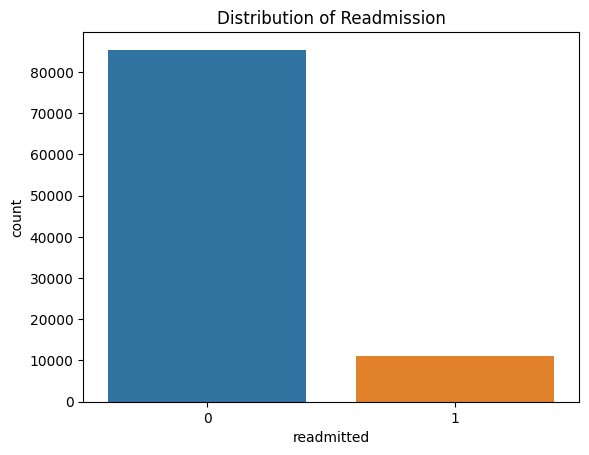

In [27]:
# Distribution of Readmission
sns.countplot(x=df['readmitted']).set_title('Distribution of Readmission')

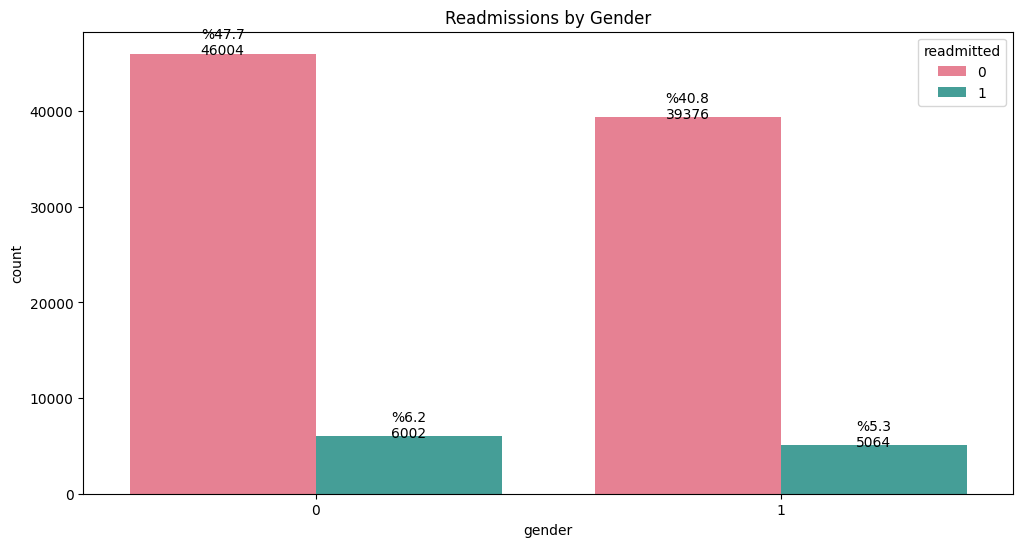

In [28]:
from pylab import rcParams
def labels(ax):
    for bar in ax.patches:
        ax.annotate('%{:.1f}\n{:.0f}'.format(100*bar.get_height()/len(df),bar.get_height()), (bar.get_x() + bar.get_width() / 2,
                        bar.get_height()), ha='center', va='center',
                       size=10, xytext=(0, 8),
                       textcoords='offset points')
rcParams['figure.figsize'] = 12,6
ax = sns.countplot(x='gender', hue='readmitted', palette='husl', data=df)
labels(ax)
plt.title('Readmissions by Gender')
plt.show()

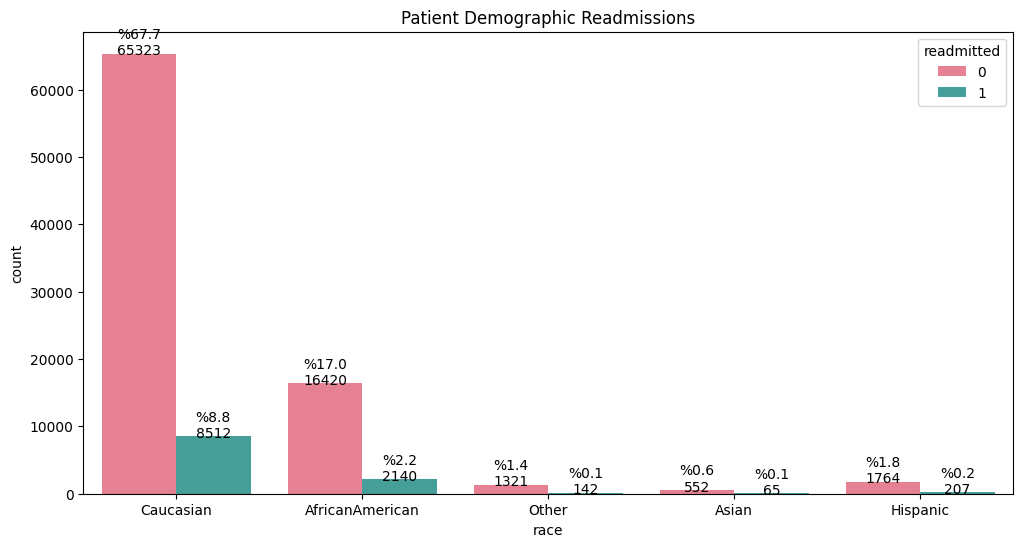

In [29]:
ax = sns.countplot(x='race', hue='readmitted', palette='husl', data=df)
labels(ax)
# sns.catplot(x='race', hue='readmitted', kind='count', palette='husl', data=df, aspect=2, legend_out=False)
plt.title('Patient Demographic Readmissions')
plt.show()

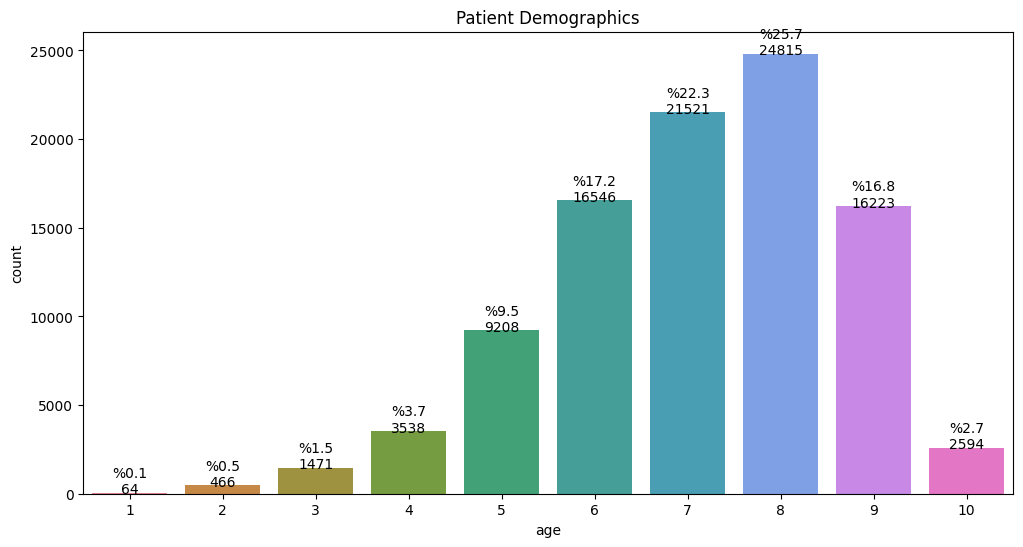

In [30]:
ax = sns.countplot(x='age', palette='husl', data=df.sort_values('age'))
labels(ax)
plt.title('Patient Demographics')
plt.show()

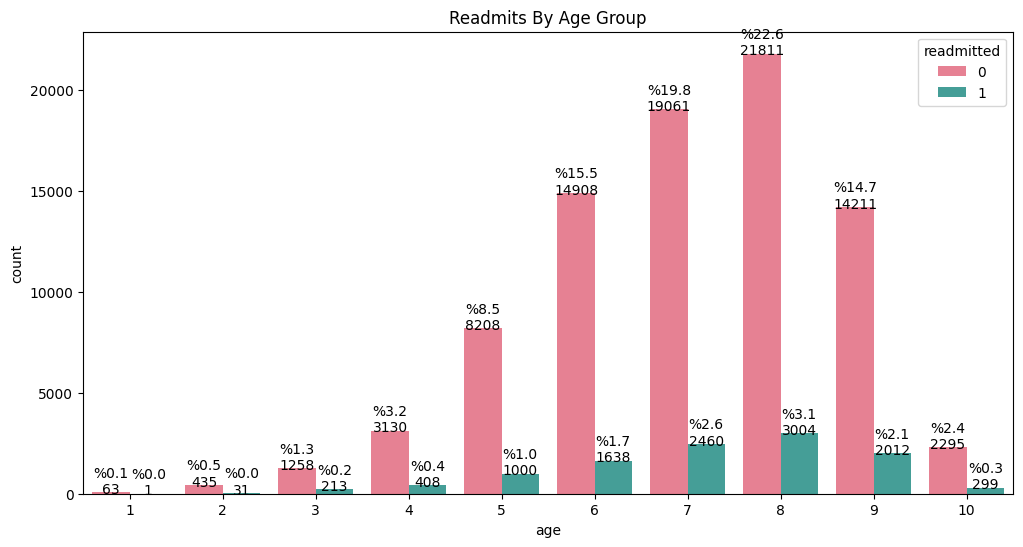

In [31]:
ax = sns.countplot(x='age', hue='readmitted', palette='husl', data=df.sort_values('age'))
labels(ax)
plt.title('Readmits By Age Group')
plt.show()

In [32]:
#### Time in Hospital and Readmission


<ipython-input-33-13feb082618e>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax=sns.kdeplot(df.loc[(df['readmitted'] == 0),'time_in_hospital'] , color='b',shade=True,label='Not Readmitted')
<ipython-input-33-13feb082618e>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax=sns.kdeplot(df.loc[(df['readmitted'] == 1),'time_in_hospital'] , color='r',shade=True, label='Readmitted')


Text(0.5, 1.0, 'Time in Hospital VS. Readmission')

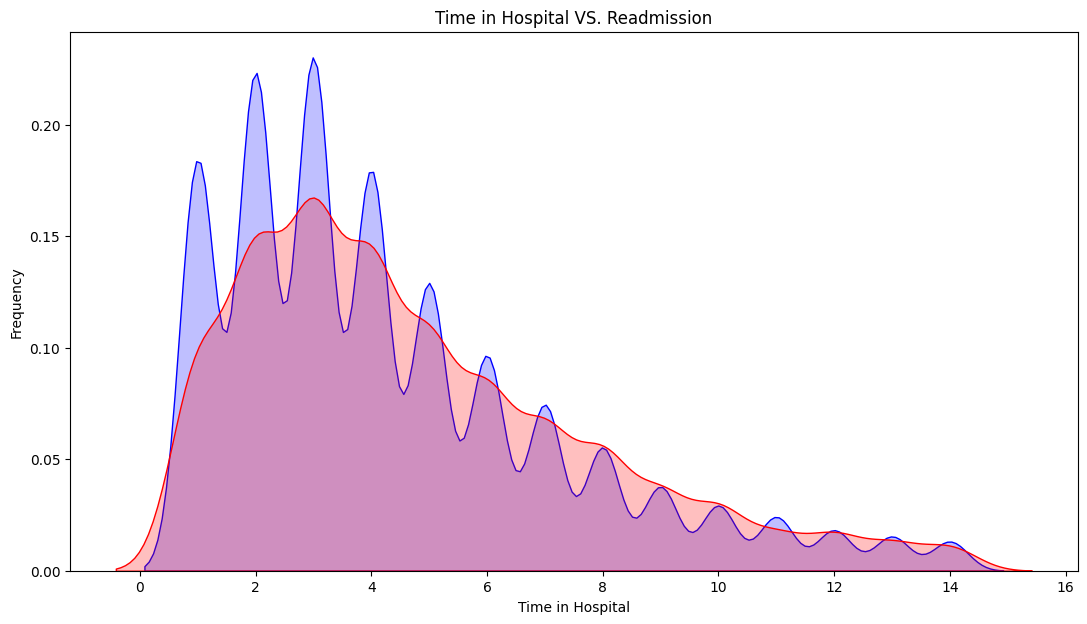

In [33]:
fig = plt.figure(figsize=(13,7),)
ax=sns.kdeplot(df.loc[(df['readmitted'] == 0),'time_in_hospital'] , color='b',shade=True,label='Not Readmitted')
ax=sns.kdeplot(df.loc[(df['readmitted'] == 1),'time_in_hospital'] , color='r',shade=True, label='Readmitted')
ax.set(xlabel='Time in Hospital', ylabel='Frequency')
plt.title('Time in Hospital VS. Readmission')

#### Age and Readmission

In [34]:
#fig = plt.figure(figsize=(15,10))
#sns.countplot(y= df['age'], hue = df['readmitted']).set_title('Age of Patient VS. Readmission')

#### Ethnicity of patient and Readmission

In [35]:
#fig = plt.figure(figsize=(8,8))
#sns.countplot(y = df['race'], hue = df['readmitted'])

#### Number of medication used and Readmission

Text(0.5, 1.0, 'Number of medication used VS. Readmission')

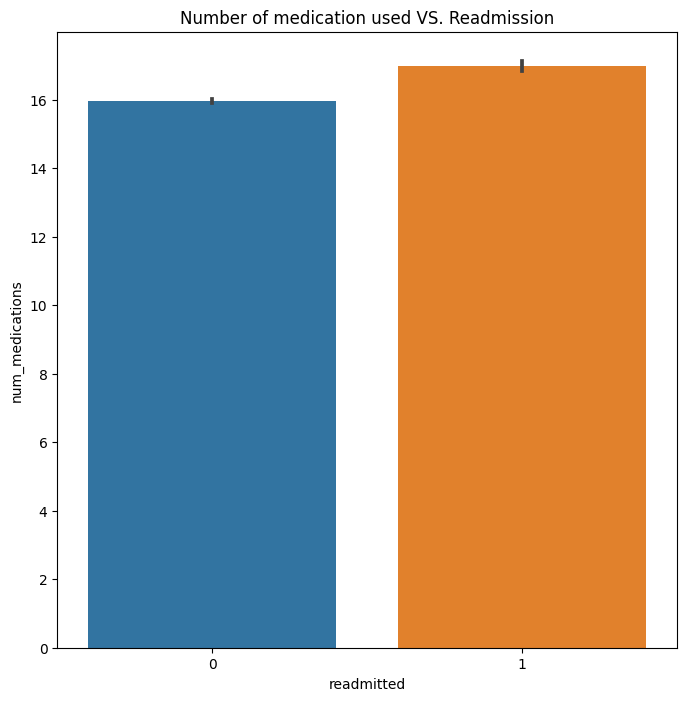

In [36]:
fig = plt.figure(figsize=(8,8))
sns.barplot(x = df['readmitted'], y = df['num_medications']).set_title("Number of medication used VS. Readmission")

#### Gender and Readmission
* Male = 1
* Female = 0

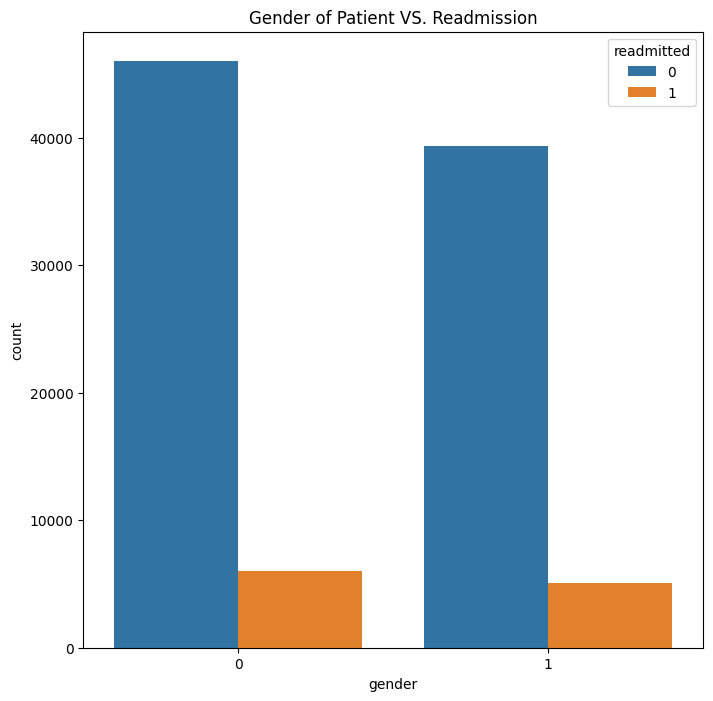

In [37]:
# Gender of Patient VS. Readmission
fig = plt.figure(figsize=(8, 8))
sns.countplot(data=df, x='gender', hue='readmitted')
plt.title("Gender of Patient VS. Readmission")
plt.show()

#### Change of Medication and Readmission
* Change = 1
* No Change = 0

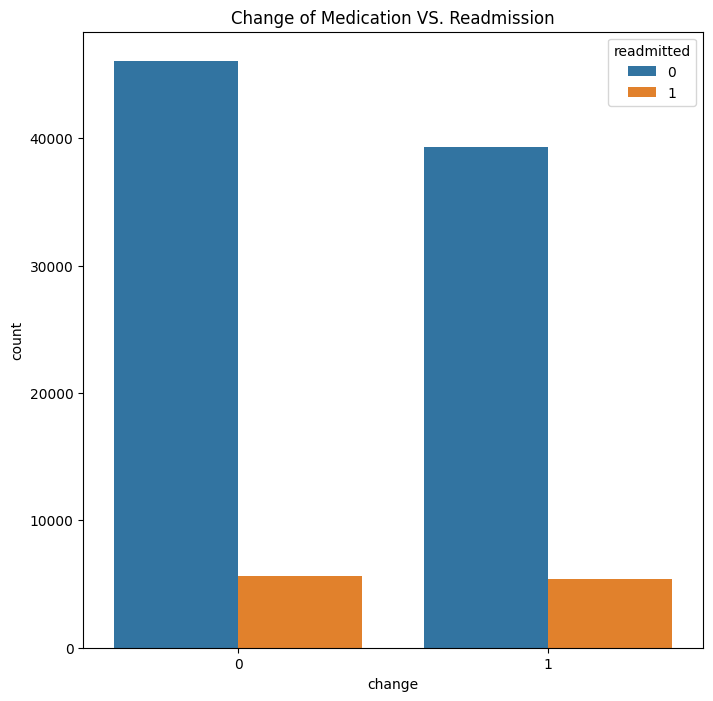

In [38]:
# Change of Medication VS. Readmission
fig = plt.figure(figsize=(8, 8))
sns.countplot(x=df['change'], hue=df['readmitted'])
plt.title('Change of Medication VS. Readmission')
plt.show()

#### Diabetes Medication prescribed and Readmission
* Diabetes Medication - medications Nominal Indicates if there was any diabetic medication prescribed.
* Values: “yes” : 1 “no” : 0

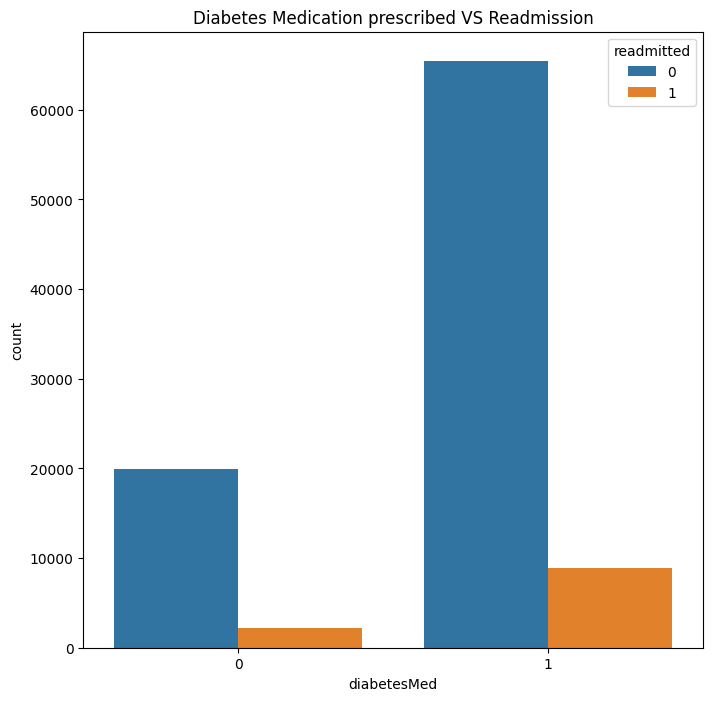

In [39]:
# Diabetes Medication prescribed VS Readmission
fig = plt.figure(figsize=(8, 8))
sns.countplot(x='diabetesMed', hue='readmitted', data=df)
plt.title('Diabetes Medication prescribed VS Readmission')
plt.show()

#### Service Utilization and Readmission


Text(0.5, 1.0, 'Service Utilization VS. Readmission')

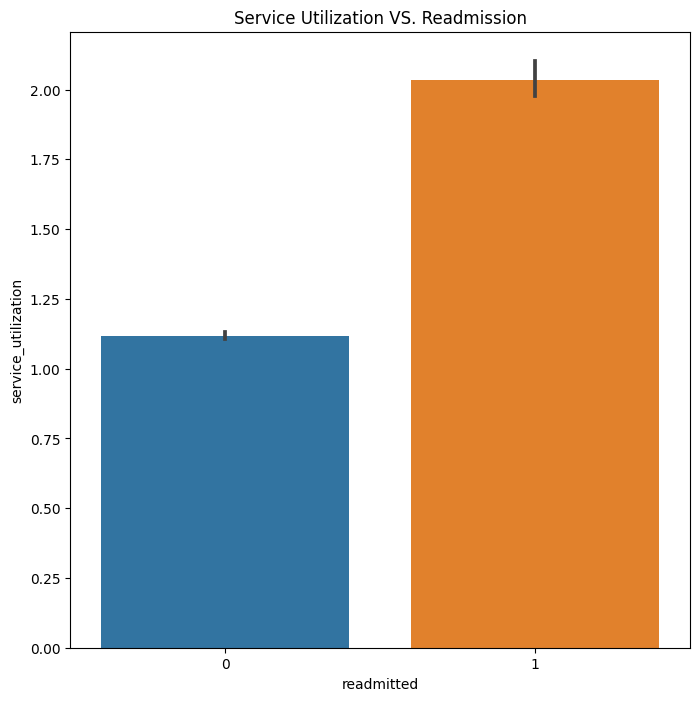

In [40]:
fig = plt.figure(figsize=(8,8))
sns.barplot( y = df['service_utilization'], x = df['readmitted']).set_title('Service Utilization VS. Readmission')

#### Glucose serum test result and Readmission
*Glucose Serum test* - A blood glucose test is used to find out if your blood sugar levels are in the healthy range. It is often used to help diagnose and monitor diabetes.

* '>200' : 1 = indicates diabetes
* '>300' : 1 = Indicates diabetes
* 'Norm' : 0 = Normal
* 'None' : -99 = test was not taken

Text(0.5, 1.0, 'Glucose test serum test result VS. Readmission')

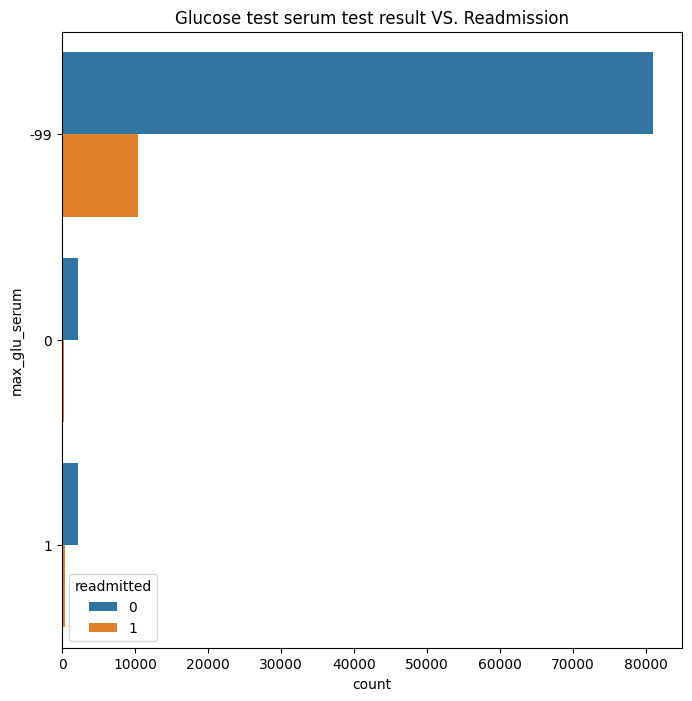

In [41]:
fig = plt.figure(figsize=(8,8))
sns.countplot(y = df['max_glu_serum'], hue = df['readmitted']).set_title('Glucose test serum test result VS. Readmission')

Text(0.5, 1.0, 'Glucose test serum test result VS. Race')

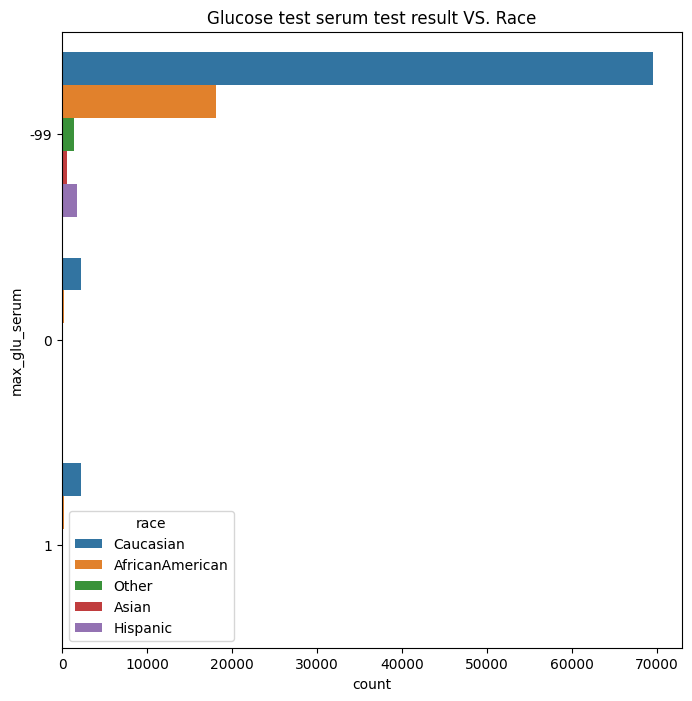

In [42]:
fig = plt.figure(figsize=(8,8))
sns.countplot(y = df['max_glu_serum'], hue = df['race']).set_title('Glucose test serum test result VS. Race')

A1C result and Readmission
*A1C test* - The A1C test is a blood test that provides information about your average levels of blood glucose, also called blood sugar, over the past 3 months.
*  '>7'   :  1   
*  '>8'   :  1   
*    Norm :  0  = Normal
*    None : -99 = Test was not taken

Text(0.5, 1.0, 'A1C test result VS. Readmission')

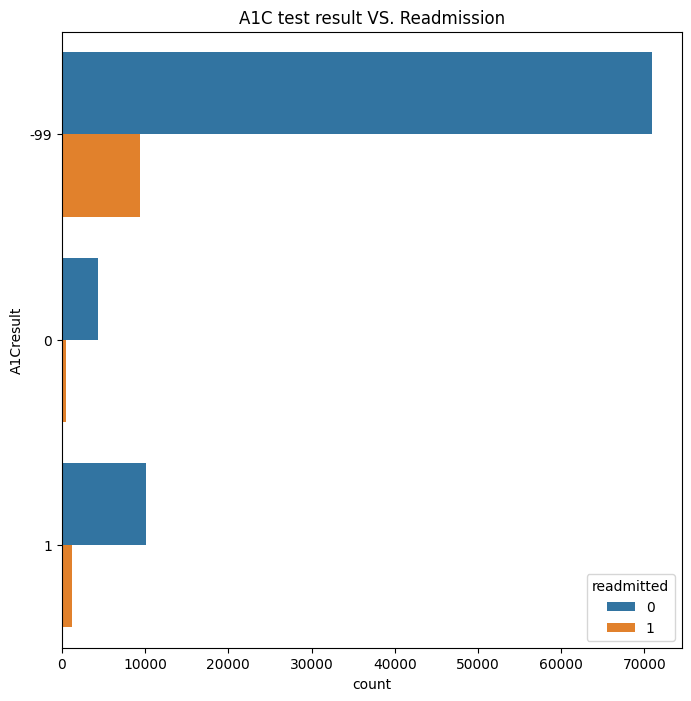

In [43]:
fig = plt.figure(figsize=(8,8))
sns.countplot(y= df['A1Cresult'], hue = df['readmitted']).set_title('A1C test result VS. Readmission')

#### Number of lab procedure and Readmission

<ipython-input-44-217a4e5fe706>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax=sns.kdeplot(df.loc[(df['readmitted'] == 0),'num_lab_procedures'] , color='b',shade=True,label='Not readmitted')
<ipython-input-44-217a4e5fe706>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax=sns.kdeplot(df.loc[(df['readmitted'] == 1),'num_lab_procedures'] , color='r',shade=True, label='readmitted')


Text(0.5, 1.0, 'Number of lab procedure VS. Readmission')

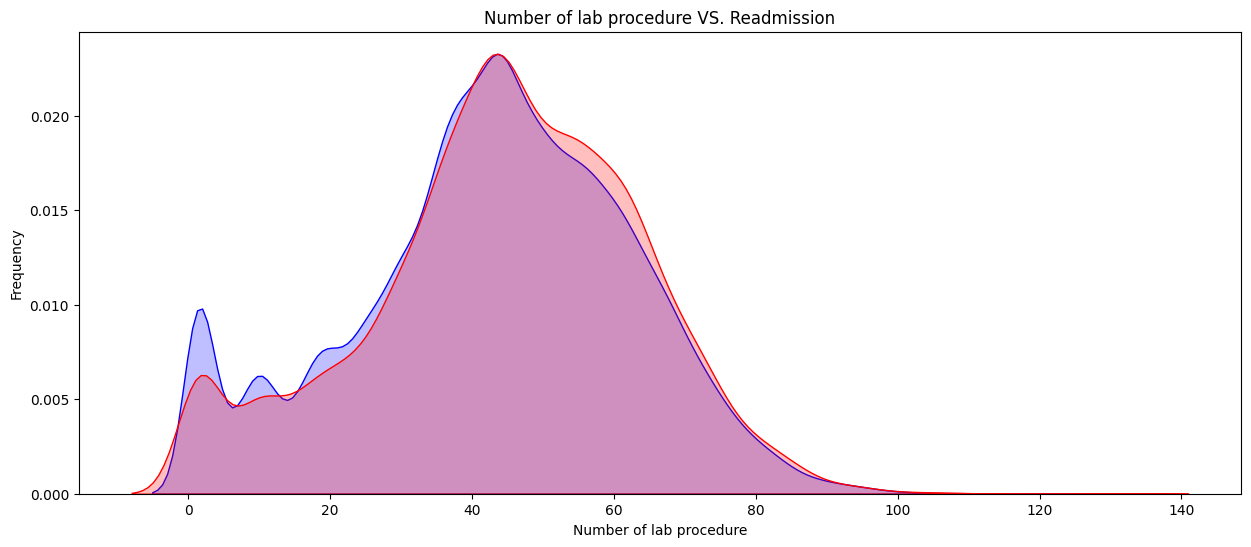

In [44]:
fig = plt.figure(figsize=(15,6),)
ax=sns.kdeplot(df.loc[(df['readmitted'] == 0),'num_lab_procedures'] , color='b',shade=True,label='Not readmitted')
ax=sns.kdeplot(df.loc[(df['readmitted'] == 1),'num_lab_procedures'] , color='r',shade=True, label='readmitted')
ax.set(xlabel='Number of lab procedure', ylabel='Frequency')
plt.title('Number of lab procedure VS. Readmission')

### Pre-Modeling Data Preprocessing
This code converts age as categorical variable to a continuous approximation by assuming mid-point of each age-category as the actual age value. This is done to avoid having to deal with age as a dummy variable in the models which makes interpretation very cumbersome. Also, since age category is not purely nominal but ordinal, we do not want to lose that information by treating it as a simple categorical variable

In [45]:
df['age'] = df['age'].astype('int64')
print(df.age.value_counts())
# convert age categories to mid-point values
age_dict = {1:5, 2:15, 3:25, 4:35, 5:45, 6:55, 7:65, 8:75, 9:85, 10:95}
df['age'] = df.age.map(age_dict)
print(df.age.value_counts())

8     24815
7     21521
6     16546
9     16223
5      9208
4      3538
10     2594
3      1471
2       466
1        64
Name: age, dtype: int64
75    24815
65    21521
55    16546
85    16223
45     9208
35     3538
95     2594
25     1471
15      466
5        64
Name: age, dtype: int64


In [46]:
# convert data type of nominal features in dataframe to 'object' type
i = ['encounter_id', 'patient_nbr', 'gender', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id',\
          'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', \
          'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose','miglitol', \
          'troglitazone', 'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin', \
          'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', \
          'age', 'A1Cresult', 'max_glu_serum', 'level1_diag1', 'level1_diag2', 'level1_diag3', 'level2_diag1', 'level2_diag2', 'level2_diag3']

x = 0
while x < len(i):
    df[i[x]] = df[i[x]].astype('object')
    x += 1


In [47]:
df.dtypes

encounter_id                object
patient_nbr                 object
race                        object
gender                      object
age                         object
admission_type_id           object
discharge_disposition_id    object
admission_source_id         object
time_in_hospital             int64
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride                 object
acetohexamide               object
glipizide                   object
glyburide           

* Number of medication used: Another possibly related factor could be the total number of medications used by the patient (which may indicate severity of their condition and/or the intensity of care). So we created another feature by counting the medications used during the encounter (keys variable in code below is continued from above):

In [48]:
df['nummed'] = 0

for col in keys:
    df['nummed'] = df['nummed'] + df[col]
df['nummed'].value_counts()

1    44589
0    22156
2    20901
3     7448
4     1290
5       57
6        5
Name: nummed, dtype: int64

In [49]:
# get list of only numeric features
num_col = list(set(list(df._get_numeric_data().columns))- {'readmitted'})
num_col

['num_medications',
 'number_diagnoses',
 'num_procedures',
 'number_emergency',
 'number_outpatient',
 'num_lab_procedures',
 'number_inpatient',
 'numchange',
 'time_in_hospital',
 'service_utilization']

In [50]:
# Removing skewnewss and kurtosis using log transformation if it is above a threshold value -  2

statdataframe = pd.DataFrame()
statdataframe['numeric_column'] = num_col
skew_before = []
skew_after = []

kurt_before = []
kurt_after = []

standard_deviation_before = []
standard_deviation_after = []

log_transform_needed = []

log_type = []

for i in num_col:
    skewval = df[i].skew()
    skew_before.append(skewval)

    kurtval = df[i].kurtosis()
    kurt_before.append(kurtval)

    sdval = df[i].std()
    standard_deviation_before.append(sdval)

    if (abs(skewval) >2) & (abs(kurtval) >2):
        log_transform_needed.append('Yes')

        if len(df[df[i] == 0])/len(df) <=0.02:
            log_type.append('log')
            skewvalnew = np.log(pd.DataFrame(df[train_data[i] > 0])[i]).skew()
            skew_after.append(skewvalnew)

            kurtvalnew = np.log(pd.DataFrame(df[train_data[i] > 0])[i]).kurtosis()
            kurt_after.append(kurtvalnew)

            sdvalnew = np.log(pd.DataFrame(df[train_data[i] > 0])[i]).std()
            standard_deviation_after.append(sdvalnew)

        else:
            log_type.append('log1p')
            skewvalnew = np.log1p(pd.DataFrame(df[df[i] >= 0])[i]).skew()
            skew_after.append(skewvalnew)

            kurtvalnew = np.log1p(pd.DataFrame(df[df[i] >= 0])[i]).kurtosis()
            kurt_after.append(kurtvalnew)

            sdvalnew = np.log1p(pd.DataFrame(df[df[i] >= 0])[i]).std()
            standard_deviation_after.append(sdvalnew)

    else:
        log_type.append('NA')
        log_transform_needed.append('No')

        skew_after.append(skewval)
        kurt_after.append(kurtval)
        standard_deviation_after.append(sdval)

statdataframe['skew_before'] = skew_before
statdataframe['kurtosis_before'] = kurt_before
statdataframe['standard_deviation_before'] = standard_deviation_before
statdataframe['log_transform_needed'] = log_transform_needed
statdataframe['log_type'] = log_type
statdataframe['skew_after'] = skew_after
statdataframe['kurtosis_after'] = kurt_after
statdataframe['standard_deviation_after'] = standard_deviation_after

In [51]:
statdataframe

,numeric_column,skew_before,kurtosis_before,standard_deviation_before,log_transform_needed,log_type,skew_after,kurtosis_after,standard_deviation_after
0,num_medications,1.339187,3.549325,8.072516,No,NA,1.339187,3.549325,8.072516
1,number_diagnoses,-0.807741,-0.372558,1.836659,No,NA,-0.807741,-0.372558,1.836659
2,num_procedures,1.313236,0.856100,1.703183,No,NA,1.313236,0.856100,1.703183
3,number_emergency,22.695921,1165.140400,0.948089,Yes,log1p,3.614471,15.854105,0.318742
4,number_outpatient,8.767489,146.244961,1.280061,Yes,log1p,2.708627,7.648535,0.432949
5,num_lab_procedures,-0.240626,-0.253275,19.656782,No,NA,-0.240626,-0.253275,19.656782
6,number_inpatient,3.566269,20.044813,1.269975,Yes,log1p,1.425127,1.319186,0.513389
7,numchange,1.426548,1.451898,0.488614,No,NA,1.426548,1.451898,0.488614
8,time_in_hospital,1.127510,0.839050,2.982330,No,NA,1.127510,0.839050,2.982330
9,service_utilization,5.312374,67.194018,2.315789,Yes,log1p,1.097244,0.497241,0.665656


In [52]:
# performing the log transformation for the columns determined to be needing it above.

for i in range(len(statdataframe)):
    if statdataframe['log_transform_needed'][i] == 'Yes':
        colname = str(statdataframe['numeric_column'][i])

        if statdataframe['log_type'][i] == 'log':
            df = df[df[colname] > 0]
            df[colname + "_log"] = np.log(df[colname])

        elif statdataframe['log_type'][i] == 'log1p':
            df = df[df[colname] >= 0]
            df[colname + "_log1p"] = np.log1p(df[colname])

In [53]:
df = df.drop(['number_outpatient', 'number_inpatient', 'number_emergency','service_utilization'], axis = 1)

In [54]:
df.shape

(96446, 54)

In [55]:
# get list of only numeric features
numerics = list(set(list(df._get_numeric_data().columns))- {'readmitted'})
numerics

['number_emergency_log1p',
 'num_medications',
 'number_inpatient_log1p',
 'service_utilization_log1p',
 'number_diagnoses',
 'num_procedures',
 'numchange',
 'num_lab_procedures',
 'time_in_hospital',
 'number_outpatient_log1p']

In [56]:
# show list of features that are categorical
df.encounter_id = df.encounter_id.astype('int64')
df.patient_nbr = df.patient_nbr.astype('int64')
df.diabetesMed = df.diabetesMed.astype('int64')
df.change = df.change.astype('int64')

# convert data type of nominal features in dataframe to 'object' type for aggregating
i = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', \
          'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose','miglitol', \
          'troglitazone', 'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin', \
          'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone','A1Cresult']
df[i] = df[i].astype('int64')

df.dtypes

encounter_id                   int64
patient_nbr                    int64
race                          object
gender                        object
age                           object
admission_type_id             object
discharge_disposition_id      object
admission_source_id           object
time_in_hospital               int64
num_lab_procedures             int64
num_procedures                 int64
num_medications                int64
diag_1                        object
diag_2                        object
diag_3                        object
number_diagnoses               int64
max_glu_serum                 object
A1Cresult                      int64
metformin                      int64
repaglinide                    int64
nateglinide                    int64
chlorpropamide                 int64
glimepiride                    int64
acetohexamide                  int64
glipizide                      int64
glyburide                      int64
tolbutamide                    int64
p

In [57]:
dfcopy = df.copy(deep = True)

In [58]:
df['readmitted'] = df['readmitted'].apply(lambda x: 0 if x == 2 else x)

In [59]:
# drop individual diagnosis columns that have too granular disease information
# also drop level 2 categorization (which was not comparable with any reference)
# also drop level 1 secondary and tertiary diagnoses
df.drop(['diag_1', 'diag_2', 'diag_3', 'level2_diag1', 'level1_diag2', 'level2_diag2', 'level1_diag3',
         'level2_diag3'], axis=1, inplace=True)

In [60]:
interactionterms = [('num_medications','time_in_hospital'),
('num_medications','num_procedures'),
('time_in_hospital','num_lab_procedures'),
('num_medications','num_lab_procedures'),
('num_medications','number_diagnoses'),
('age','number_diagnoses'),
('change','num_medications'),
('number_diagnoses','time_in_hospital'),
('num_medications','numchange')]

In [61]:
for inter in interactionterms:
    name = inter[0] + '|' + inter[1]
    df[name] = df[inter[0]] * df[inter[1]]

In [62]:
df[['num_medications','time_in_hospital', 'num_medications|time_in_hospital']].head()

,num_medications,time_in_hospital,num_medications|time_in_hospital
1,18,3,54
2,13,2,26
3,16,2,32
4,8,1,8
5,16,3,48


In [63]:
# Feature Scaling
datf = pd.DataFrame()
datf['features'] = numerics
datf['std_dev'] = datf['features'].apply(lambda x: df[x].std())
datf['mean'] = datf['features'].apply(lambda x: df[x].mean())

In [64]:
# dropping multiple encounters while keeping either first or last encounter of these patients
df2 = df.drop_duplicates(subset= ['patient_nbr'], keep = 'first')
df2.shape

(67580, 55)

In [65]:
# standardize function
def standardize(raw_data):
    return ((raw_data - np.mean(raw_data, axis = 0)) / np.std(raw_data, axis = 0))

In [66]:
df2[numerics] = standardize(df2[numerics])
import scipy as sp
df2 = df2[(np.abs(sp.stats.zscore(df2[numerics])) < 3).all(axis=1)]

<ipython-input-66-d878bd60c0ea>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[numerics] = standardize(df2[numerics])


In [67]:
from matplotlib.colors import ListedColormap
my_cmap = ListedColormap(sns.light_palette((250, 100, 50), input="husl", n_colors=50).as_hex())
table = df2.drop(['patient_nbr', 'encounter_id'], axis=1).corr(method='pearson')
table.style.background_gradient(cmap=my_cmap, axis = 0)

<ipython-input-67-e0e8b8383330>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  table = df2.drop(['patient_nbr', 'encounter_id'], axis=1).corr(method='pearson')
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/style.py:3931: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/style.py:3932: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_diagnoses,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,numchange,number_emergency_log1p,number_outpatient_log1p,number_inpatient_log1p,service_utilization_log1p,num_medications|time_in_hospital,num_medications|num_procedures,time_in_hospital|num_lab_procedures,num_medications|num_lab_procedures,num_medications|number_diagnoses,change|num_medications,number_diagnoses|time_in_hospital,num_medications|numchange
time_in_hospital,1.000000,0.320135,0.144392,0.441167,0.224011,0.074127,-0.012421,0.031130,0.006653,0.001164,0.008496,nan,0.013698,0.024610,0.005062,-0.004376,-0.000813,0.000816,-0.002206,0.005697,-0.006658,0.097371,-0.000302,0.002334,nan,nan,0.002794,0.094406,0.059811,0.055148,0.139670,-0.001829,-0.027614,0.051496,0.006862,0.859364,0.270542,0.853015,0.502133,0.456259,0.231169,0.938944,0.229845
num_lab_procedures,0.320135,1.000000,0.013923,0.230888,0.138471,0.275953,-0.050781,0.004737,-0.007755,-0.002344,-0.009528,nan,0.016552,0.002659,0.000595,-0.017770,-0.008809,-0.001930,-0.003635,0.005200,-0.001007,0.100137,-0.014247,-0.003791,nan,nan,-0.003981,0.064560,0.037476,0.025644,0.111876,0.006784,-0.041207,0.049153,-0.001783,0.328828,0.114754,0.674595,0.732844,0.258944,0.135242,0.322335,0.155882
num_procedures,0.144392,0.013923,1.000000,0.334918,0.060380,-0.029517,-0.057326,0.003596,-0.005481,0.005286,0.005021,nan,0.004639,0.002828,0.000057,0.012495,0.008016,-0.001833,0.001009,-0.005735,-0.000290,0.002454,-0.009110,-0.003373,nan,nan,-0.000936,-0.016197,-0.017345,0.002086,-0.010997,-0.026767,-0.017295,-0.012699,-0.030508,0.263700,0.877783,0.138598,0.244440,0.292403,0.109633,0.153126,0.075090
num_medications,0.441167,0.230888,0.334918,1.000000,0.246879,0.017807,0.079213,0.025270,0.029485,0.002097,0.043243,nan,0.055362,0.043031,0.005079,0.074775,0.058254,0.013927,0.003052,0.004254,-0.001558,0.194339,0.008746,0.004263,nan,nan,0.002838,0.233256,0.190055,0.038768,0.193801,0.013399,0.031576,0.034802,0.045034,0.752726,0.599321,0.439898,0.772237,0.898603,0.530894,0.459725,0.392592
number_diagnoses,0.224011,0.138471,0.060380,0.246879,1.000000,0.002965,-0.072136,0.031346,0.014555,-0.015598,0.011962,nan,-0.012608,-0.024172,0.000012,0.004104,-0.006777,0.006827,-0.001207,0.005222,-0.010419,0.090370,-0.002435,0.001743,nan,nan,-0.007024,0.042334,0.022503,0.039630,0.065829,0.050317,0.057902,0.051598,0.086039,0.244135,0.111045,0.219112,0.250720,0.599241,0.123807,0.484368,0.120178
A1Cresult,0.074127,0.275953,-0.029517,0.017807,0.002965,1.000000,0.037758,0.017018,0.001161,-0.001984,0.018481,nan,0.008055,0.003427,-0.001884,-0.003550,0.004826,0.000822,-0.002303,-0.003314,-0.001725,0.097721,-0.002506,0.003027,nan,nan,-0.001913,0.093606,0.072348,-0.005258,0.111597,-0.011517,-0.032616,-0.044000,-0.050729,0.062720,0.001700,0.179762,0.178755,0.028221,0.078234,0.061569,0.099571
metformin,-0.012421,-0.050781,-0.057326,0.079213,-0.072136,0.037758,1.000000,0.004808,0.015700,-0.011728,0.040138,nan,0.074350,0.137700,-0.008118,0.053039,0.094224,0.007915,0.011794,-0.003630,-0.001183,-0.024419,-0.026028,-0.001732,nan,nan,0.007992,0.353272,0.297217,-0.010145,0.019618,-0.002027,0.026385,-0.018782,0.008378,0.018048,-0.012299,-0.035697,0.008037,0.029440,0.300672,-0.034162,0.026116
repaglinide,0.031130,0.004737,0.003596,0.025270,0.031346,0.017018,0.004808,1.000000,0.001098,-0.003697,-0.008599,nan,-0.020277,-0.023441,-0.001789,0.015039,0.017576,0.024239,0.025697,-0.000800,-0.002401,0.009263,-0.005950,-0.001222,nan,nan,-0.000462,0.076469,0.065508,0.015210,0.031696,0.009063,0.000443,0.010728,0.009623,0.031432,0.008609,0.025028,0.021517,0.035126,0.069362,0.039709,0.031813
nateglinide,0.006653,-0.007755,-0.005481,

In [68]:
df2['level1_diag1'] = df2['level1_diag1'].astype('object')
df_pd = pd.get_dummies(df2, columns=['gender', 'admission_type_id', 'discharge_disposition_id',
                                      'admission_source_id', 'max_glu_serum', 'A1Cresult', 'level1_diag1'], drop_first = True)
just_dummies = pd.get_dummies(df_pd['race'])
df_pd = pd.concat([df_pd, just_dummies], axis=1)
df_pd.drop(['race'], inplace=True, axis=1)

<ipython-input-68-ef4c466f9e5c>:2: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  df_pd = pd.get_dummies(df2, columns=['gender', 'admission_type_id', 'discharge_disposition_id',
<ipython-input-68-ef4c466f9e5c>:2: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  df_pd = pd.get_dummies(df2, columns=['gender', 'admission_type_id', 'discharge_disposition_id',
<ipython-input-68-ef4c466f9e5c>:2: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  df_pd = pd.get_dummies(df2, columns=['gender', 'admission_type_id', 'discharge_disposition_id',
<ipython-input-68-ef4c466f9e5c>:2: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype seq

In [69]:
non_num_cols = ['race', 'gender', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
                'max_glu_serum', 'A1Cresult', 'level1_diag1' ]

In [70]:
num_cols = list(set(list(df._get_numeric_data().columns))- {'readmitted', 'change'})
num_cols

['number_diagnoses|time_in_hospital',
 'num_medications|time_in_hospital',
 'pioglitazone',
 'glipizide-metformin',
 'glyburide',
 'tolbutamide',
 'tolazamide',
 'A1Cresult',
 'number_emergency_log1p',
 'service_utilization_log1p',
 'number_inpatient_log1p',
 'num_medications|num_procedures',
 'number_diagnoses',
 'num_procedures',
 'nateglinide',
 'diabetesMed',
 'metformin',
 'acarbose',
 'metformin-pioglitazone',
 'change|num_medications',
 'num_medications|numchange',
 'glipizide',
 'num_medications|number_diagnoses',
 'chlorpropamide',
 'num_medications|num_lab_procedures',
 'insulin',
 'num_medications',
 'acetohexamide',
 'glimepiride-pioglitazone',
 'time_in_hospital|num_lab_procedures',
 'glimepiride',
 'number_outpatient_log1p',
 'encounter_id',
 'metformin-rosiglitazone',
 'miglitol',
 'repaglinide',
 'numchange',
 'troglitazone',
 'num_lab_procedures',
 'rosiglitazone',
 'patient_nbr',
 'glyburide-metformin',
 'time_in_hospital']

In [71]:
new_non_num_cols = []
for i in non_num_cols:
    for j in df_pd.columns:
        if i in j:
            new_non_num_cols.append(j)

In [72]:
new_non_num_cols

['gender_1',
 'admission_type_id_3',
 'admission_type_id_4',
 'admission_type_id_5',
 'discharge_disposition_id_2',
 'discharge_disposition_id_7',
 'discharge_disposition_id_10',
 'discharge_disposition_id_18',
 'discharge_disposition_id_19',
 'discharge_disposition_id_20',
 'discharge_disposition_id_27',
 'discharge_disposition_id_28',
 'admission_source_id_4',
 'admission_source_id_7',
 'admission_source_id_8',
 'admission_source_id_9',
 'admission_source_id_11',
 'max_glu_serum_0',
 'max_glu_serum_1',
 'A1Cresult_0',
 'A1Cresult_1',
 'level1_diag1_1.0',
 'level1_diag1_2.0',
 'level1_diag1_3.0',
 'level1_diag1_4.0',
 'level1_diag1_5.0',
 'level1_diag1_6.0',
 'level1_diag1_7.0',
 'level1_diag1_8.0']

In [73]:
l = []
for feature in list(df_pd.columns):
    if '|' in feature:
        l.append(feature)
l

['num_medications|time_in_hospital',
 'num_medications|num_procedures',
 'time_in_hospital|num_lab_procedures',
 'num_medications|num_lab_procedures',
 'num_medications|number_diagnoses',
 'age|number_diagnoses',
 'change|num_medications',
 'number_diagnoses|time_in_hospital',
 'num_medications|numchange']

In [74]:
df_pd.head().T

,1,2,3,4,5
encounter_id,149190,64410,500364,16680,35754
patient_nbr,55629189,86047875,82442376,42519267,82637451
age,15,25,35,45,55
time_in_hospital,-0.444872,-0.784109,-0.784109,-1.123345,-0.444872
num_lab_procedures,0.803605,-1.60206,0.051835,0.402661,-0.5997
...,...,...,...,...,...
AfricanAmerican,0,1,0,0,0
Asian,0,0,0,0,0
Caucasian,1,0,1,1,1
Hispanic,0,0,0,0,0


## Modeling

In [75]:
feature_set = ['age', 'time_in_hospital', 'num_procedures', 'num_medications', 'number_outpatient_log1p',
                 'number_emergency_log1p', 'number_inpatient_log1p', 'number_diagnoses', 'metformin',
                 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide', 'glyburide',
                 'pioglitazone', 'rosiglitazone', 'acarbose', 'tolazamide', 'insulin', 'glyburide-metformin',
                 'AfricanAmerican', 'Asian', 'Caucasian', 'Hispanic', 'Other', 'gender_1',
                 'admission_type_id_3', 'admission_type_id_5', 'discharge_disposition_id_2', 'discharge_disposition_id_7',
                 'discharge_disposition_id_10', 'discharge_disposition_id_18', 'admission_source_id_4',
                 'admission_source_id_7', 'admission_source_id_9', 'max_glu_serum_0', 'max_glu_serum_1', 'A1Cresult_0',
                 'A1Cresult_1', 'num_medications|time_in_hospital', 'num_medications|num_procedures',
                 'time_in_hospital|num_lab_procedures', 'num_medications|num_lab_procedures', 'num_medications|number_diagnoses',
                 'age|number_diagnoses', 'change|num_medications', 'number_diagnoses|time_in_hospital',
                 'num_medications|numchange', 'level1_diag1_1.0', 'level1_diag1_2.0', 'level1_diag1_3.0', 'level1_diag1_4.0',
                 'level1_diag1_5.0','level1_diag1_6.0', 'level1_diag1_7.0', 'level1_diag1_8.0']

In [76]:
X = df_pd[feature_set]
y = df_pd['readmitted']

### Logistic Regression

In [77]:
df_pd['readmitted'].value_counts()

0    54635
1     5071
Name: readmitted, dtype: int64

Since our target variable is having class imbalance problem, So will use SMOTE technique to resolve it


In [78]:
#from imblearn.over_sampling import SMOTE
#from collections import Counter
#from sklearn.model_selection import train_test_split
#print('Original dataset shape {}'.format(Counter(y_train)))

#X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.40, random_state=0)

#sm = SMOTE(random_state=20)
#train_input_new, train_output_new = sm.fit_resample(X_train, y_train)
#print('New dataset shape {}'.format(Counter(train_output_new)))

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=0)
#logit = LogisticRegression(fit_intercept=True, penalty='l1')
logit = LogisticRegression(C=1, penalty='l1', solver='liblinear')
logit.fit(X_train, y_train)


LogisticRegression(C=1, penalty='l1', solver='liblinear')

### Decision Tree

In [80]:
feature_set_no_int = ['age', 'time_in_hospital', 'num_procedures', 'num_medications', 'number_outpatient_log1p',
                 'number_emergency_log1p', 'number_inpatient_log1p', 'number_diagnoses', 'metformin',
                 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide',
                 'glyburide', 'pioglitazone', 'rosiglitazone', 'acarbose',
                 'tolazamide', 'insulin', 'glyburide-metformin',
                 'AfricanAmerican', 'Asian', 'Caucasian',
                 'Hispanic', 'Other', 'gender_1',
                 'admission_type_id_3', 'admission_type_id_5',
                 'discharge_disposition_id_2', 'discharge_disposition_id_7',
                 'discharge_disposition_id_10', 'discharge_disposition_id_18',
                 'admission_source_id_4', 'admission_source_id_7',
                 'admission_source_id_9', 'max_glu_serum_0',
                 'max_glu_serum_1', 'A1Cresult_0', 'A1Cresult_1',
                 'level1_diag1_1.0',
                 'level1_diag1_2.0',
                 'level1_diag1_3.0',
                 'level1_diag1_4.0',
                 'level1_diag1_5.0',
                 'level1_diag1_6.0',
                 'level1_diag1_7.0',
                 'level1_diag1_8.0']

In [81]:
X = df_pd[feature_set_no_int]
y = df_pd['readmitted']
df_pd['readmitted'].value_counts()

0    54635
1     5071
Name: readmitted, dtype: int64

In [82]:
X.shape

(59706, 48)

In [83]:
y.shape

(59706,)

In [84]:
from imblearn.over_sampling import SMOTE
from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
smt = SMOTE(random_state=20)
train_input_new, train_output_new = smt.fit_resample(X, y)
print('New dataset shape {}'.format(Counter(train_output_new)))
train_input_new = pd.DataFrame(train_input_new, columns = list(X.columns))
X_train, X_test, y_train, y_test = train_test_split(train_input_new, train_output_new, test_size=0.20, random_state=42)

Original dataset shape Counter({0: 54635, 1: 5071})
New dataset shape Counter({0: 54635, 1: 54635})


In [85]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=28, criterion = "entropy", min_samples_split=10)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=28, min_samples_split=10)

In [86]:
dtree_pred = dtree.predict(X_test)
pd.crosstab(pd.Series(y_test, name = 'Actual'), pd.Series(dtree_pred, name = 'Predict'), margins = True)

Predict,0,1,All
Actual,,,
0,2106,1967,4073
1,182,175,357
All,2288,2142,4430


In [87]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print("Accuracy is {0:.2f}".format(accuracy_score(y_test, dtree_pred)))
print("Precision is {0:.2f}".format(precision_score(y_test, dtree_pred)))
print("Recall is {0:.2f}".format(recall_score(y_test, dtree_pred)))

accuracy_dtree = accuracy_score(y_test, dtree_pred)
precision_dtree = precision_score(y_test, dtree_pred)
recall_dtree = recall_score(y_test, dtree_pred)

Accuracy is 0.90
Precision is 0.91
Recall is 0.88


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


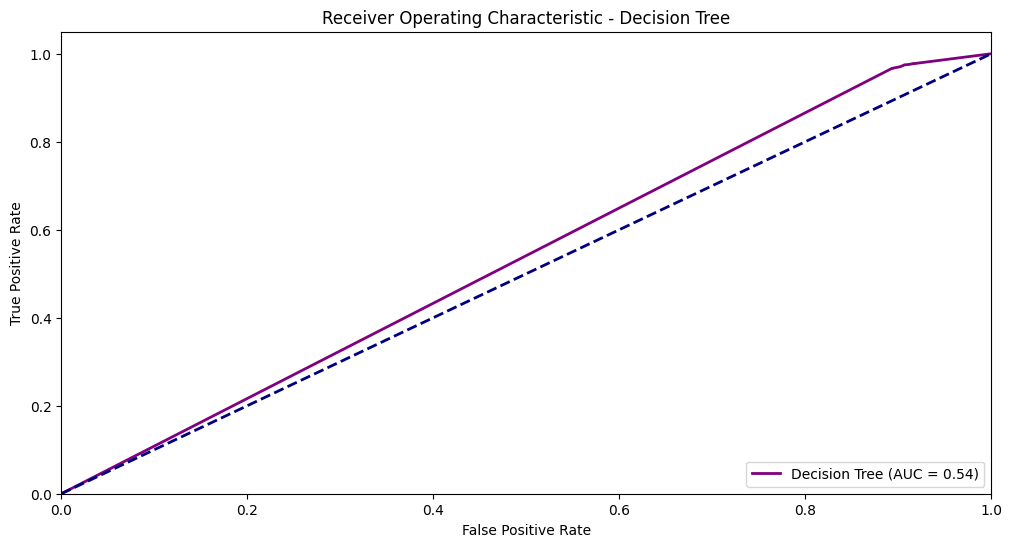

In [88]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Assuming you have the predicted probabilities and true labels for the positive class
y_pred_prob_dtree = dtree.predict_proba(X_test_scaled)[:, 1]
fpr_dtree, tpr_dtree, thresholds_dtree = roc_curve(y_test, y_pred_prob_dtree)
roc_auc_dtree = auc(fpr_dtree, tpr_dtree)

# Plotting the ROC curve for Decision Tree
plt.figure()
plt.plot(fpr_dtree, tpr_dtree, color='purple', lw=2, label='Decision Tree (AUC = %0.2f)' % roc_auc_dtree)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Decision Tree')
plt.legend(loc="lower right")
plt.show()


                       Feature  Importance
34       admission_source_id_7    0.008476
8                    metformin    0.009207
29  discharge_disposition_id_2    0.009504
19                     insulin    0.009973
26                    gender_1    0.010025
0                          age    0.031833
7             number_diagnoses    0.068012
2               num_procedures    0.076681
3              num_medications    0.091690
1             time_in_hospital    0.556395


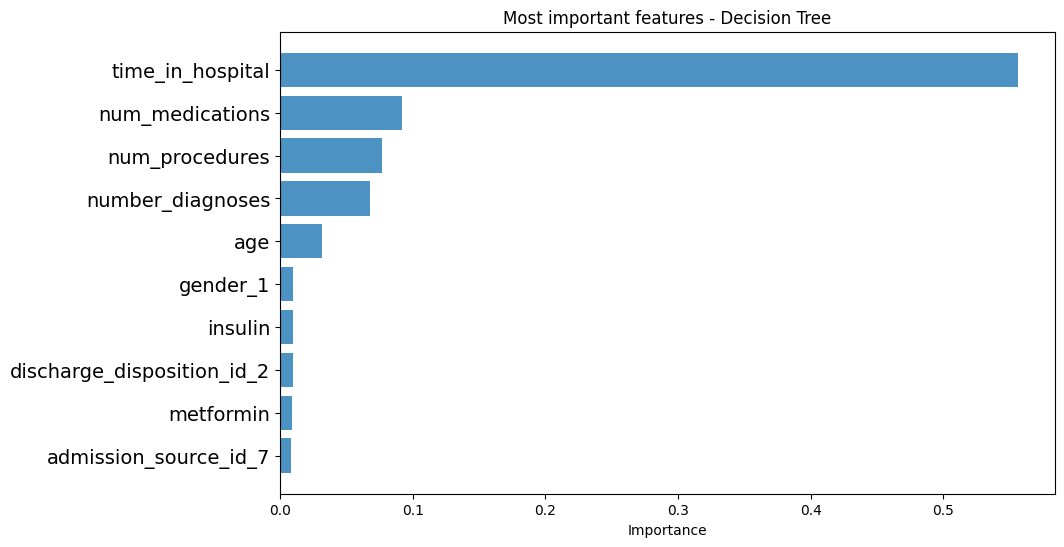

In [89]:
# Create list of top most features based on importance
feature_names = X_train.columns
feature_imports = dtree.feature_importances_
most_imp_features = pd.DataFrame([f for f in zip(feature_names,feature_imports)], columns=["Feature", "Importance"]).nlargest(10, "Importance")
most_imp_features.sort_values(by="Importance", inplace=True)
print(most_imp_features)
plt.figure(figsize=(10,6))
plt.barh(range(len(most_imp_features)), most_imp_features.Importance, align='center', alpha=0.8)
plt.yticks(range(len(most_imp_features)), most_imp_features.Feature, fontsize=14)
plt.xlabel('Importance')
plt.title('Most important features - Decision Tree')
plt.show()

In [90]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr = LogisticRegression(solver='sag', max_iter=1000)
lr.fit(X_train_scaled, y_train)

lr_pred = lr.predict(X_test_scaled)

accuracy_lr = accuracy_score(y_test, lr_pred)
precision_lr = precision_score(y_test, lr_pred)
recall_lr = recall_score(y_test, lr_pred)
print("Accuracy is {0:.2f}".format(accuracy_score(y_test, lr_pred)))
print("Precision is {0:.2f}".format(precision_score(y_test, lr_pred)))
print("Recall is {0:.2f}".format(recall_score(y_test, lr_pred)))


Accuracy is 0.76
Precision is 0.76
Recall is 0.77


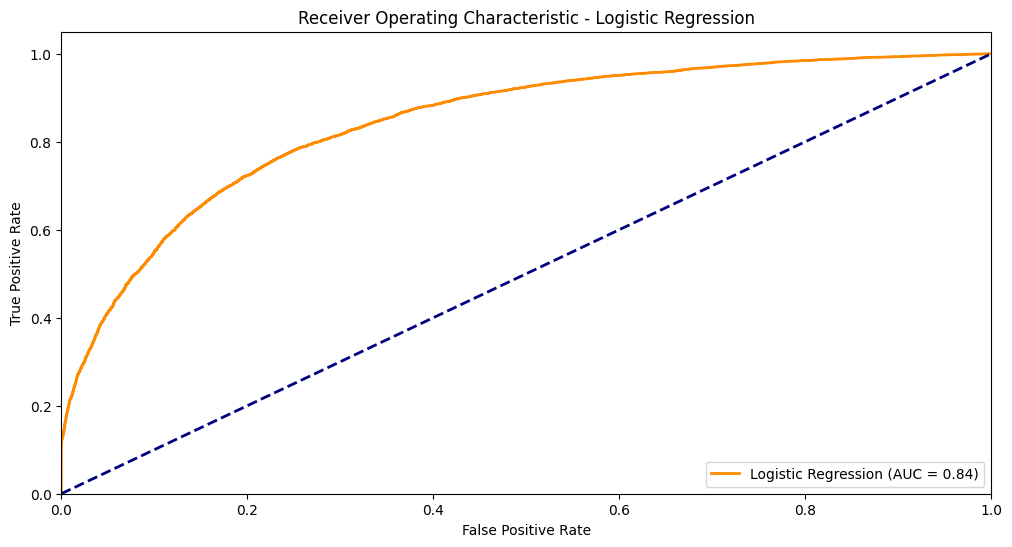

In [91]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming you have the predicted probabilities and true labels for the positive class
y_pred_prob_lr = lr.predict_proba(X_test_scaled)[:, 1]
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_pred_prob_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

# Plotting the ROC curve for logistic regression
plt.figure()
plt.plot(fpr_lr, tpr_lr, color='darkorange', lw=2, label='Logistic Regression (AUC = %0.2f)' % roc_auc_lr)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Logistic Regression')
plt.legend(loc="lower right")
plt.show()


### Random Forest

In [92]:
X = df_pd[feature_set_no_int]
y = df_pd['readmitted']

print('Original dataset shape {}'.format(Counter(y)))
smt = SMOTE(random_state=20)
train_input_new, train_output_new = smt.fit_resample(X, y)
print('New dataset shape {}'.format(Counter(train_output_new)))
train_input_new = pd.DataFrame(train_input_new, columns = list(X.columns))
X_train, X_test, y_train, y_test = train_test_split(train_input_new, train_output_new, test_size=0.20, random_state=42)

Original dataset shape Counter({0: 54635, 1: 5071})
New dataset shape Counter({0: 54635, 1: 54635})


In [93]:
from sklearn.ensemble import RandomForestClassifier
rm = RandomForestClassifier(n_estimators = 10, max_depth=25, criterion = "gini", min_samples_split=10)
rm.fit(X_train, y_train)

RandomForestClassifier(max_depth=25, min_samples_split=10, n_estimators=10)

In [94]:
rm_prd = rm.predict(X_test)
pd.crosstab(pd.Series(y_test, name = 'Actual'), pd.Series(rm_prd, name = 'Predict'), margins = True)

Predict,0,1,All
Actual,,,
0,2000,2073,4073
1,175,182,357
All,2175,2255,4430


In [95]:
print("Accuracy is {0:.2f}".format(accuracy_score(y_test, rm_prd)))
print("Precision is {0:.2f}".format(precision_score(y_test, rm_prd)))
print("Recall is {0:.2f}".format(recall_score(y_test, rm_prd)))

accuracy_rm = accuracy_score(y_test, rm_prd)
precision_rm = precision_score(y_test, rm_prd)
recall_rm = recall_score(y_test, rm_prd)

Accuracy is 0.89
Precision is 0.88
Recall is 0.90


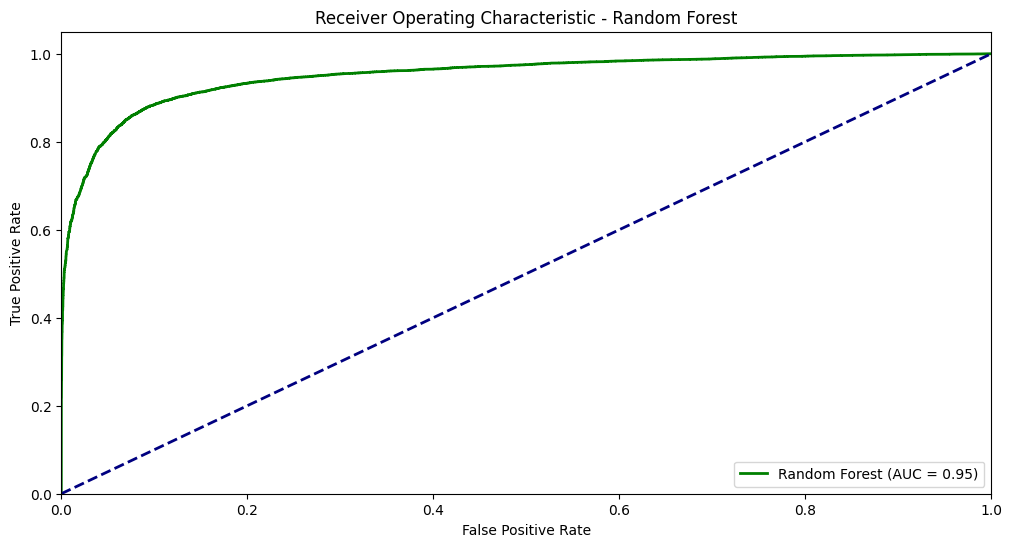

In [96]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming you have the predicted probabilities and true labels for the positive class
y_pred_prob_rm = rm.predict_proba(X_test)[:, 1]
fpr_rm, tpr_rm, thresholds_rm = roc_curve(y_test, y_pred_prob_rm)
roc_auc_rm = auc(fpr_rm, tpr_rm)


# Plotting the ROC curve for Random Forest
plt.figure()
plt.plot(fpr_rm, tpr_rm, color='green', lw=2, label='Random Forest (AUC = %0.2f)' % roc_auc_rm)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Random Forest')
plt.legend(loc="lower right")
plt.show()



In [97]:
###Naive Bayes

In [98]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score

nb = GaussianNB()
nb.fit(X_train, y_train)

nb_pred = nb.predict(X_test)

accuracy_nb = accuracy_score(y_test, nb_pred)
precision_nb = precision_score(y_test, nb_pred)
recall_nb = recall_score(y_test, nb_pred)

print("Accuracy is {0:.2f}".format(accuracy_nb))
print("Precision is {0:.2f}".format(precision_nb))
print("Recall is {0:.2f}".format(recall_nb))



Accuracy is 0.65
Precision is 0.59
Recall is 0.89


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


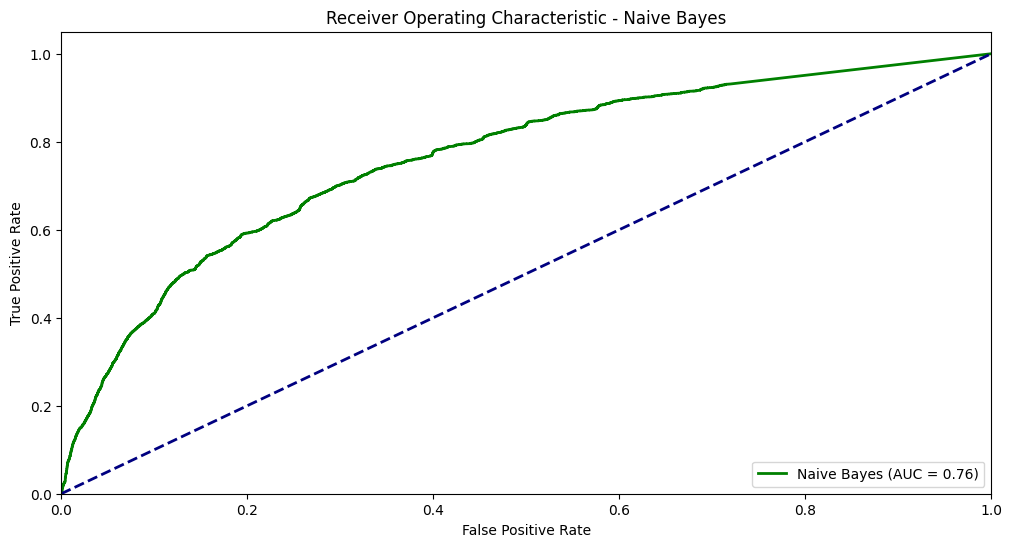

In [99]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming you have the predicted probabilities and true labels for the positive class
y_pred_prob_nb = nb.predict_proba(X_test_scaled)[:, 1]
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, y_pred_prob_nb)
roc_auc_nb = auc(fpr_nb, tpr_nb)

# Plotting the ROC curve for Naive Bayes
plt.figure()
plt.plot(fpr_nb, tpr_nb, color='green', lw=2, label='Naive Bayes (AUC = %0.2f)' % roc_auc_nb)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Naive Bayes')
plt.legend(loc="lower right")
plt.show()


In [100]:
####SVC Model


In [101]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score

svm = SVC()
svm.fit(X_train, y_train)

svm_pred = svm.predict(X_test)

accuracy_svm = accuracy_score(y_test, svm_pred)
precision_svm = precision_score(y_test, svm_pred)
recall_svm = recall_score(y_test, svm_pred)

print("Accuracy is {0:.2f}".format(accuracy_svm))
print("Precision is {0:.2f}".format(precision_svm))
print("Recall is {0:.2f}".format(recall_svm))


Accuracy is 0.72
Precision is 0.69
Recall is 0.78


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


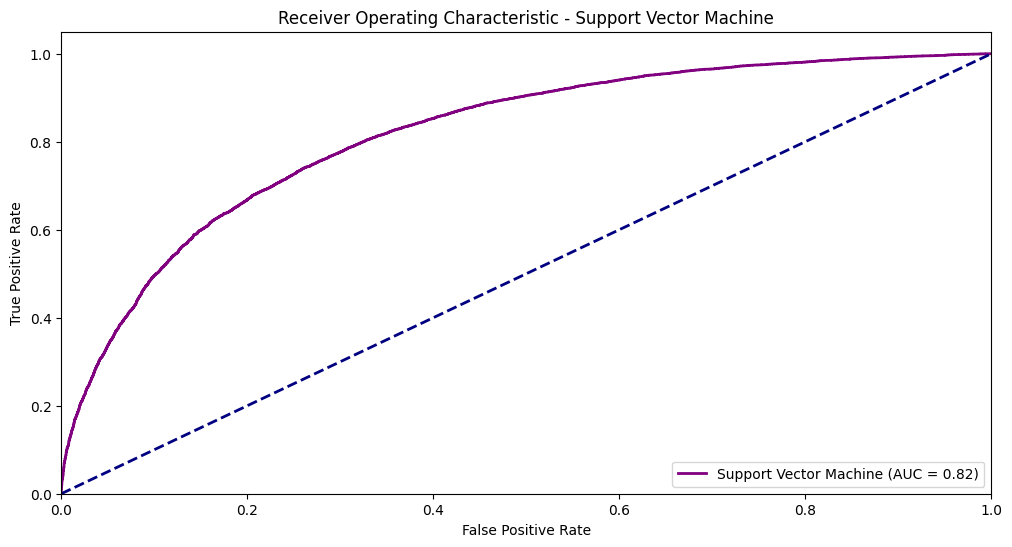

In [102]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming you have the predicted probabilities and true labels for the positive class
y_pred_prob_svm = svm.decision_function(X_test_scaled)
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_pred_prob_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

# Plotting the ROC curve for SVM
plt.figure()
plt.plot(fpr_svm, tpr_svm, color='purple', lw=2, label='Support Vector Machine (AUC = %0.2f)' % roc_auc_svm)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Support Vector Machine')
plt.legend(loc="lower right")
plt.show()


In [103]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

knn_pred = knn.predict(X_test)

accuracy_knn = accuracy_score(y_test, knn_pred)
precision_knn = precision_score(y_test, knn_pred)
recall_knn = recall_score(y_test, knn_pred)

print("Accuracy is {0:.2f}".format(accuracy_knn))
print("Precision is {0:.2f}".format(precision_knn))
print("Recall is {0:.2f}".format(recall_knn))


Accuracy is 0.77
Precision is 0.69
Recall is 0.98


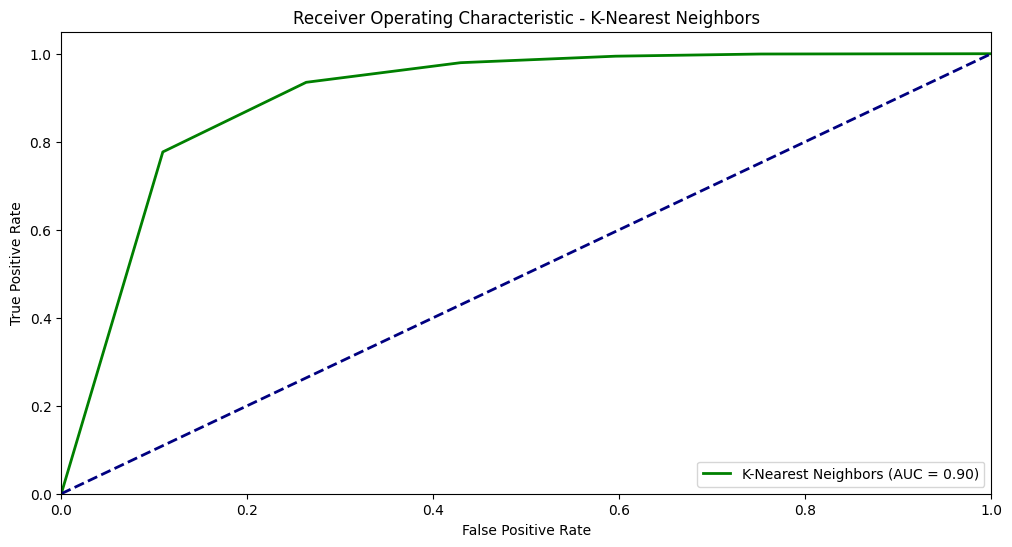

In [104]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming you have the predicted probabilities and true labels for the positive class
y_pred_prob_knn = knn.predict_proba(X_test)[:, 1]
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_pred_prob_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

# Plotting the ROC curve for KNN
plt.figure()
plt.plot(fpr_knn, tpr_knn, color='green', lw=2, label='K-Nearest Neighbors (AUC = %0.2f)' % roc_auc_knn)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - K-Nearest Neighbors')
plt.legend(loc="lower right")
plt.show()


In [105]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

gb_pred = gb.predict(X_test)

accuracy_gb = accuracy_score(y_test, gb_pred)
precision_gb = precision_score(y_test, gb_pred)
recall_gb = recall_score(y_test, gb_pred)

print("Accuracy is {0:.2f}".format(accuracy_gb))
print("Precision is {0:.2f}".format(precision_gb))
print("Recall is {0:.2f}".format(recall_gb))


Accuracy is 0.89
Precision is 0.91
Recall is 0.85


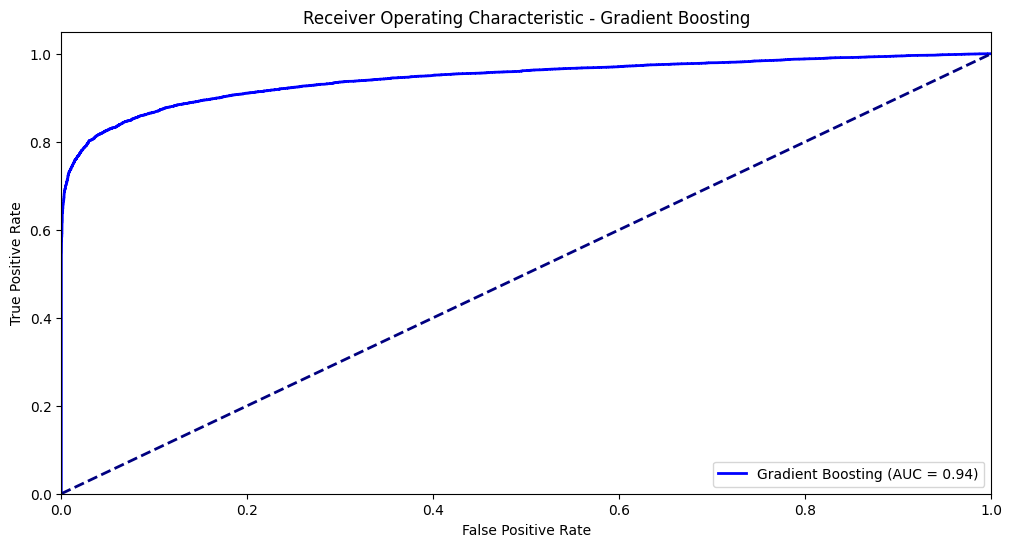

In [106]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming you have the predicted probabilities and true labels for the positive class
y_pred_prob_gb = gb.predict_proba(X_test)[:, 1]
fpr_gb, tpr_gb, thresholds_gb = roc_curve(y_test, y_pred_prob_gb)
roc_auc_gb = auc(fpr_gb, tpr_gb)

# Plotting the ROC curve for Gradient Boosting
plt.figure()
plt.plot(fpr_gb, tpr_gb, color='blue', lw=2, label='Gradient Boosting (AUC = %0.2f)' % roc_auc_gb)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Gradient Boosting')
plt.legend(loc="lower right")
plt.show()


In [107]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

mlp = MLPClassifier(hidden_layer_sizes=(100, 100), activation='relu', solver='adam', random_state=0)
mlp.fit(X_train, y_train)

mlp_pred = mlp.predict(X_test)

accuracy_mlp = accuracy_score(y_test, mlp_pred)
precision_mlp = precision_score(y_test, mlp_pred)
recall_mlp = recall_score(y_test, mlp_pred)

print("Accuracy is {0:.2f}".format(accuracy_mlp))
print("Precision is {0:.2f}".format(precision_mlp))
print("Recall is {0:.2f}".format(recall_mlp))


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy is 0.82
Precision is 0.83
Recall is 0.81


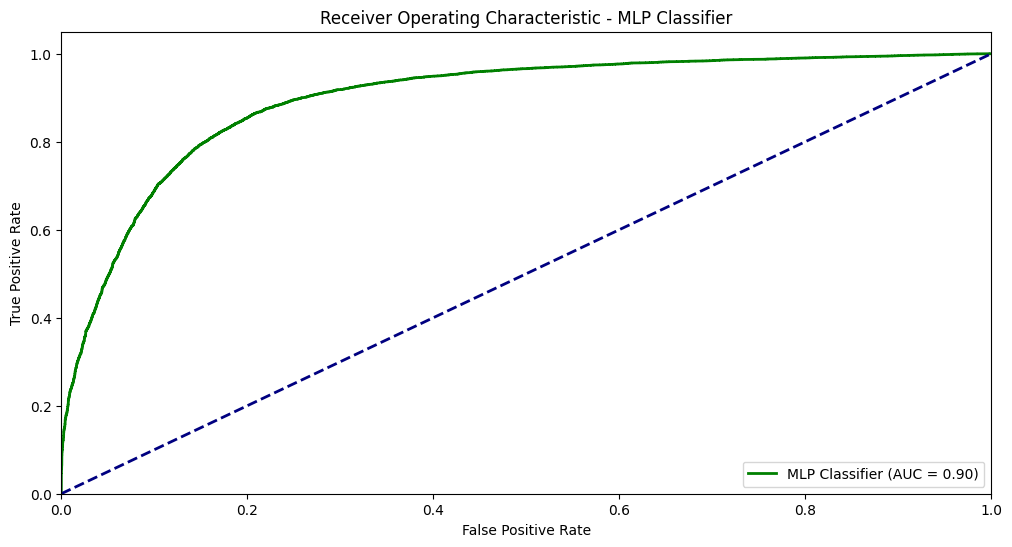

In [108]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming you have the predicted probabilities and true labels for the positive class
y_pred_prob_mlp = mlp.predict_proba(X_test)[:, 1]
fpr_mlp, tpr_mlp, thresholds_mlp = roc_curve(y_test, y_pred_prob_mlp)
roc_auc_mlp = auc(fpr_mlp, tpr_mlp)

# Plotting the ROC curve for MLP Classifier
plt.figure()
plt.plot(fpr_mlp, tpr_mlp, color='green', lw=2, label='MLP Classifier (AUC = %0.2f)' % roc_auc_mlp)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - MLP Classifier')
plt.legend(loc="lower right")
plt.show()


In [109]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Convert the input arrays to float32
X_train = X_train.astype('float32')
y_train = y_train.astype('float32')

# Define the neural network architecture
model = keras.Sequential([
    keras.layers.Dense(100, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

# Make predictions
nn_pred = model.predict_classes(X_test)

# Convert the predictions to 1D array
nn_pred = nn_pred.flatten()

# Calculate accuracy, precision, and recall
accuracy_nn = accuracy_score(y_test, nn_pred)
precision_nn = precision_score(y_test, nn_pred)
recall_nn = recall_score(y_test, nn_pred)

print("Accuracy is {0:.2f}".format(accuracy_nn))
print("Precision is {0:.2f}".format(precision_nn))
print("Recall is {0:.2f}".format(recall_nn))



Epoch 1/100
2732/2732 [==============================] - 7s 2ms/step - loss: 0.5569 - accuracy: 0.7184
Epoch 2/100
2732/2732 [==============================] - 6s 2ms/step - loss: 0.5172 - accuracy: 0.7470
Epoch 3/100
2732/2732 [==============================] - 6s 2ms/step - loss: 0.5026 - accuracy: 0.7563
Epoch 4/100
2732/2732 [==============================] - 5s 2ms/step - loss: 0.4884 - accuracy: 0.7655
Epoch 5/100
2732/2732 [==============================] - 6s 2ms/step - loss: 0.4811 - accuracy: 0.7687
Epoch 6/100
2732/2732 [==============================] - 5s 2ms/step - loss: 0.4742 - accuracy: 0.7734
Epoch 7/100
2732/2732 [==============================] - 6s 2ms/step - loss: 0.4696 - accuracy: 0.7760
Epoch 8/100
2732/2732 [==============================] - 5s 2ms/step - loss: 0.4648 - accuracy: 0.7804
Epoch 9/100
2732/2732 [==============================] - 5s 2ms/step - loss: 0.4610 - accuracy: 0.7834
Epoch 10/100
2732/2732 [==============================] - 6s 2ms/step - l

AttributeError: ignored

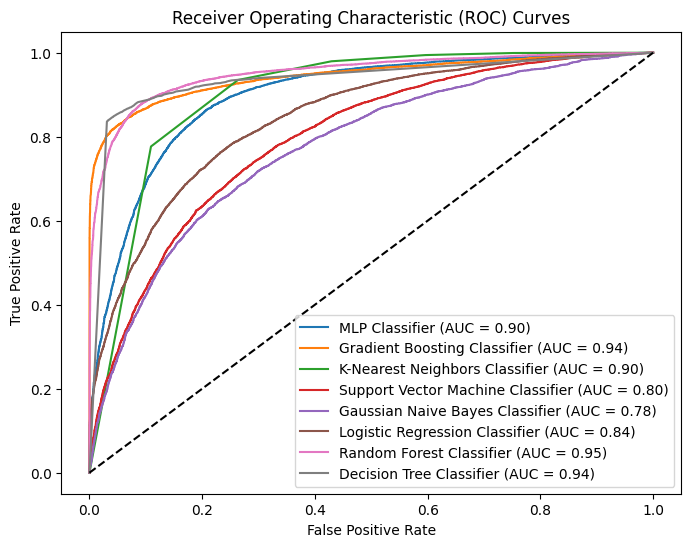

In [113]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# MLP Classifier
mlp_prob = mlp.predict_proba(X_test)[:, 1]
fpr_mlp, tpr_mlp, _ = roc_curve(y_test, mlp_prob)
auc_mlp = roc_auc_score(y_test, mlp_prob)

# Gradient Boosting Classifier
gb_prob = gb.predict_proba(X_test)[:, 1]
fpr_gb, tpr_gb, _ = roc_curve(y_test, gb_prob)
auc_gb = roc_auc_score(y_test, gb_prob)

# K-Nearest Neighbors Classifier
knn_prob = knn.predict_proba(X_test)[:, 1]
fpr_knn, tpr_knn, _ = roc_curve(y_test, knn_prob)
auc_knn = roc_auc_score(y_test, knn_prob)

# Support Vector Machine Classifier
svm_prob = svm.decision_function(X_test)
fpr_svm, tpr_svm, _ = roc_curve(y_test, svm_prob)
auc_svm = roc_auc_score(y_test, svm_prob)

# Gaussian Naive Bayes Classifier
nb_prob = nb.predict_proba(X_test)[:, 1]
fpr_nb, tpr_nb, _ = roc_curve(y_test, nb_prob)
auc_nb = roc_auc_score(y_test, nb_prob)

# Logistic Regression Classifier
lr_prob = lr.predict_proba(X_test_scaled)[:, 1]
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_prob)
auc_lr = roc_auc_score(y_test, lr_prob)

# Random Forest Classifier
rm_prob = rm.predict_proba(X_test)[:, 1]
fpr_rm, tpr_rm, _ = roc_curve(y_test, rm_prob)
auc_rm = roc_auc_score(y_test, rm_prob)

# Decision Tree Classifier
dtree_prob = dtree.predict_proba(X_test)[:, 1]
fpr_dtree, tpr_dtree, _ = roc_curve(y_test, dtree_prob)
auc_dtree = roc_auc_score(y_test, dtree_prob)

# Plotting ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_mlp, tpr_mlp, label='MLP Classifier (AUC = {:.2f})'.format(auc_mlp))
plt.plot(fpr_gb, tpr_gb, label='Gradient Boosting Classifier (AUC = {:.2f})'.format(auc_gb))
plt.plot(fpr_knn, tpr_knn, label='K-Nearest Neighbors Classifier (AUC = {:.2f})'.format(auc_knn))
plt.plot(fpr_svm, tpr_svm, label='Support Vector Machine Classifier (AUC = {:.2f})'.format(auc_svm))
plt.plot(fpr_nb, tpr_nb, label='Gaussian Naive Bayes Classifier (AUC = {:.2f})'.format(auc_nb))
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression Classifier (AUC = {:.2f})'.format(auc_lr))
plt.plot(fpr_rm, tpr_rm, label='Random Forest Classifier (AUC = {:.2f})'.format(auc_rm))
plt.plot(fpr_dtree, tpr_dtree, label='Decision Tree Classifier (AUC = {:.2f})'.format(auc_dtree))
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc='lower right')
plt.show()


In [ ]:
# Create list of top most features based on importance
feature_names = X_train.columns
feature_imports = rm.feature_importances_
most_imp_features = pd.DataFrame([f for f in zip(feature_names,feature_imports)], columns=["Feature", "Importance"]).nlargest(10, "Importance")
most_imp_features.sort_values(by="Importance", inplace=True)
plt.figure(figsize=(10,6))
plt.barh(range(len(most_imp_features)), most_imp_features.Importance, align='center', alpha=0.8)
plt.yticks(range(len(most_imp_features)), most_imp_features.Feature, fontsize=14)
plt.xlabel('Importance')
plt.title('Most important features - Random Forest ')
plt.show()

In [ ]:
# Convert "age" column to numeric data type
X_train["age"] = pd.to_numeric(X_train["age"], errors="coerce")
X_test["age"] = pd.to_numeric(X_test["age"], errors="coerce")

# Check if conversion was successful
if X_train["age"].isnull().any() or X_test["age"].isnull().any():
    print("Error: Failed to convert 'age' column to numeric data type.")
else:
    # Convert the data to DMatrix format for compatibility with XGBoost
    dtrain = xgb.DMatrix(X_train, label=y_train)
    dtest = xgb.DMatrix(X_test)


In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Assuming you have X_train, y_train, X_test, y_test

# Convert the data to DMatrix format for compatibility with XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test)

# Set the parameters for XGBoost
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'seed': 0
}

# Train the XGBoost model
model = xgb.train(params, dtrain)

# Make predictions on the test set
y_pred = model.predict(dtest)

# Convert the probabilities to binary predictions
gb_pred = (y_pred > 0.5).astype(int)

# Calculate performance metrics
accuracy_gb = accuracy_score(y_test, gb_pred)
precision_gb = precision_score(y_test, gb_pred)
recall_gb = recall_score(y_test, gb_pred)

# Print the results
print("Accuracy is {0:.2f}".format(accuracy_gb))
print("Precision is {0:.2f}".format(precision_gb))
print("Recall is {0:.2f}".format(recall_gb))

In [ ]:
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve

# Calculate performance metrics
auc_roc_gb = roc_auc_score(y_test, y_pred)  # Calculate AUC-ROC

# Calculate the false positive rate (fpr) and true positive rate (tpr) for the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Plot the ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {0:.2f})'.format(auc_roc_gb))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - XGBoost')
plt.legend(loc="lower right")
plt.show()




## Model Comparision

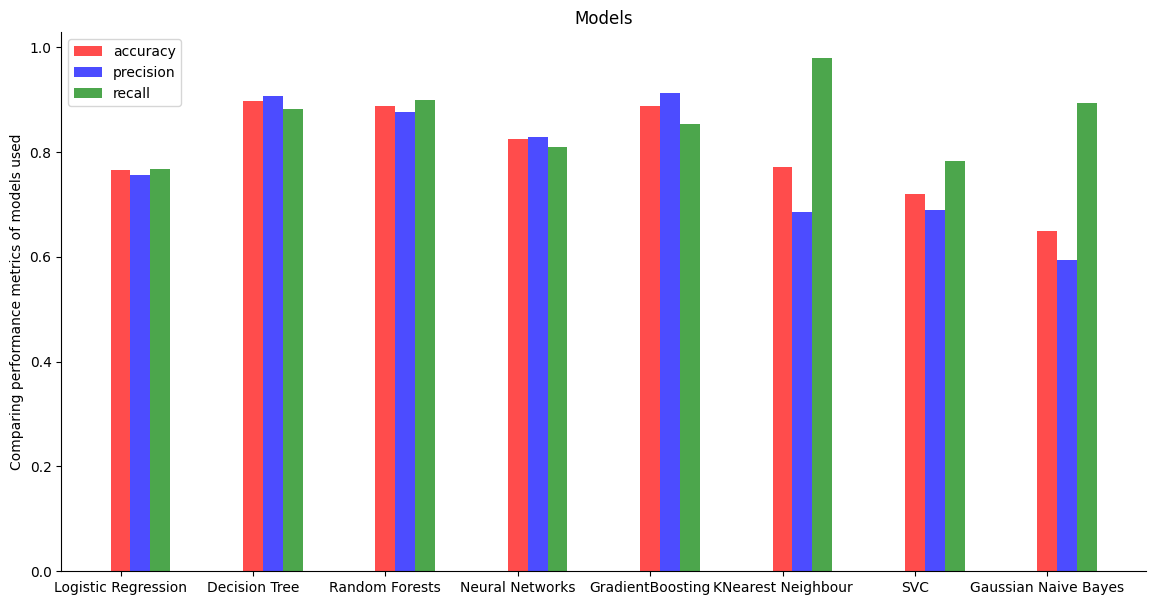

In [111]:
plt.figure(figsize=(14, 7))
ax = plt.subplot(111)

models = ['Logistic Regression', 'Decision Tree', 'Random Forests', 'Neural Networks', 'GradientBoosting', 'KNearest Neighbour','SVC','Gaussian Naive Bayes',]
values = [accuracy_lr, accuracy_dtree, accuracy_rm, accuracy_mlp, accuracy_gb, accuracy_knn, accuracy_svm, accuracy_nb,]
model = np.arange(len(models))

plt.bar(model, values, align='center', width = 0.15, alpha=0.7, color = 'red', label= 'accuracy')
plt.xticks(model, models)



ax = plt.subplot(111)

models = ['Logistic Regression', 'Decision Tree', 'Random Forests', 'Neural Networks', 'GradientBoosting', 'KNearest Neighbour','SVC','Gaussian Naive Bayes',]
values = [precision_lr, precision_dtree, precision_rm, precision_mlp, precision_gb, precision_knn, precision_svm, precision_nb,]
model = np.arange(len(models))

plt.bar(model+0.15, values, align='center', width = 0.15, alpha=0.7, color = 'blue', label = 'precision')
plt.xticks(model, models)



ax = plt.subplot(111)

models = ['Logistic Regression', 'Decision Tree', 'Random Forests', 'Neural Networks', 'GradientBoosting', 'KNearest Neighbour','SVC','Gaussian Naive Bayes', ]
values = [recall_lr, recall_dtree, recall_rm, recall_mlp, recall_gb, recall_knn, recall_svm, recall_nb,]
model = np.arange(len(models))

plt.bar(model+0.3, values, align='center', width = 0.15, alpha=0.7, color = 'green', label = 'recall')
plt.xticks(model, models)



plt.ylabel('Comparing performance metrics of models used')
plt.title('Models')

# removing the axis on the top and right of the plot window
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend()

plt.show()